In [1]:
import pandas as pd 
import sklearn 
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pd.options.mode.chained_assignment = None  # default='warn'

2023-03-01 18:14:47.730062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [3]:
read_counts = pd.read_csv("read_counts_with_diseases_and_trimester.txt", sep="\t")
read_counts

,0,1,2,3,4,5,6,7,8,9,...,57728,57729,57730,57731,57732,57733,57734,57735,disease,trimester
0,3,9,0,0,0,0,0,0,0,0,...,45,3,0,0,0,135,0,0,Preeclampsia,2ndT
1,0,0,0,0,0,0,0,0,0,0,...,50,0,0,1,13,179,3,0,Preeclampsia,cordB
2,0,1,0,0,0,0,0,0,0,0,...,17,0,0,0,7,132,1,0,Preeclampsia,1stT
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,47,0,0,Preeclampsia,1stT
4,19,0,0,0,0,0,0,0,0,0,...,41,0,0,0,0,20,0,0,Preeclampsia,2ndT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0,0,0,0,11,2,0,0,0,0,...,16,0,0,0,2,90,0,0,Chronic-Hypertension,2ndT
130,0,4,0,0,0,0,0,0,0,0,...,75,0,0,0,30,134,0,0,Chronic-Hypertension,1stT
131,0,2,0,0,3,1,0,2,0,0,...,30,0,0,0,5,139,3,0,Chronic-Hypertension,3rdT
132,0,2,0,0,0,0,0,0,0,0,...,43,1,0,0,8,175,1,0,Chronic-Hypertension,cordB


In [4]:
genes = pd.read_csv("gene_transcripts.txt", sep="\t")
genes

,transcript
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000243485
3,ENSG00000237613
4,ENSG00000268020
...,...
57732,ENSG00000160307
57733,ENSG00000160310
57734,ENSG00000230982
57735,ENSG00000212932


In [5]:
first_trimester_data = read_counts.loc[read_counts["trimester"] == "1stT"]
first_trimester_data.drop("trimester", axis=1, inplace=True)
first_trimester_data = first_trimester_data.T
first_trimester_data = first_trimester_data.T
first_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
2,0,1,0,0,0,0,0,0,0,0,...,0,17,0,0,0,7,132,1,0,Preeclampsia
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47,0,0,Preeclampsia
5,1,1,0,0,6,0,0,0,0,0,...,0,13,2,0,0,2,76,0,0,Preeclampsia
9,1,0,0,0,0,0,0,0,0,0,...,0,47,0,0,0,0,30,0,0,Preeclampsia
20,0,0,0,0,0,0,0,0,0,0,...,0,28,0,0,0,10,111,11,0,Preeclampsia
22,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,65,0,0,Preeclampsia
25,0,0,0,0,3,0,0,0,0,0,...,0,26,0,0,0,0,160,0,0,Preeclampsia
27,0,0,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,83,0,0,Preeclampsia
43,0,5,0,0,0,0,0,0,0,1,...,0,24,0,0,0,0,65,0,0,Gestational-Diabetes
44,11,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,4,95,1,0,Gestational-Diabetes


In [6]:
first_trimester_data_copy = pd.read_csv("first_trimester_data.txt", sep="\t")
first_trimester_data_copy

,2,3,5,9,20,22,25,27,43,44,...,83,89,92,99,108,114,117,118,124,130
0,0,6,1,1,0,0,0,0,0,11,...,0,0,0,0,0,31,31,0,0,0
1,1,0,1,0,0,2,0,0,5,0,...,0,0,0,0,1,0,2,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,6,0,0,0,3,0,0,0,...,0,0,0,5,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
57732,7,0,2,0,10,0,0,0,0,4,...,28,0,0,3,4,34,10,18,8,30
57733,132,47,76,30,111,65,160,83,65,95,...,371,146,44,121,153,251,577,116,73,134
57734,1,0,0,0,11,0,0,0,0,1,...,8,0,0,8,0,8,13,0,4,0


In [7]:
first_trimester_diseases = pd.read_csv("first_trimester_diseases.txt", sep="\t")
first_trimester_diseases

,disease
0,Preeclampsia
1,Preeclampsia
2,Preeclampsia
3,Preeclampsia
4,Preeclampsia
5,Preeclampsia
6,Preeclampsia
7,Preeclampsia
8,Gestational-Diabetes
9,Gestational-Diabetes


# Preeclampsia Trimester 1

## case: preeclampsia control: healthy pregnancy

In [252]:
## case: pregnancy complications (all diseases) control: healthy pregnancyfirst_trimester_data["preeclampsia"] = np.where(first_trimester_data.disease.str.contains("Preeclampsia"), 1, 0)
preeclampsia_firstT = first_trimester_data[(first_trimester_data.disease == "Normal-Pregnancy")| (first_trimester_data.disease == "Preeclampsia")]
preeclampsia_firstT = preeclampsia_firstT.drop("disease", axis=1)
preeclampsia_firstT

,0,1,2,3,4,5,6,7,8,9,...,57730,57731,57732,57733,57734,57735,preeclampsia,gestational_diabetes,chronic_hypertension,normal_pregnancy
2,0,1,0,0,0,0,0,0,0,0,...,0,0,7,132,1,0,1,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,47,0,0,1,0,0,0
5,1,1,0,0,6,0,0,0,0,0,...,0,0,2,76,0,0,1,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,1,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,10,111,11,0,1,0,0,0
22,0,2,0,0,0,0,0,0,0,0,...,0,0,0,65,0,0,1,0,0,0
25,0,0,0,0,3,0,0,0,0,0,...,0,0,0,160,0,0,1,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,83,0,0,1,0,0,0
83,0,0,0,0,0,0,0,0,0,1,...,0,0,28,371,8,0,0,0,0,1
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,146,0,0,0,0,0,1


## differential expression

In [253]:
preeclampsia_dif_exp_firstT = pd.read_csv("preeclamspsia_diffe_firstT.txt", sep=" ")
preeclampsia_dif_exp_firstT = preeclampsia_dif_exp_firstT[preeclampsia_dif_exp_firstT["PValue"] < 0.05]
preeclampsia_dif_exp_firstT

,logFC,logCPM,PValue
10,3.180071,0.883838,0.047930
36,2.960056,8.313645,0.000203
38,2.771296,4.957936,0.000762
40,3.284296,5.123061,0.000178
41,2.693262,7.605304,0.000881
...,...,...,...
57623,3.241062,0.788932,0.039195
57674,1.398103,6.289814,0.018297
57675,0.716503,7.220625,0.036297
57676,3.313341,3.064286,0.002075


In [254]:
preeclampsia_dif_exp_firstT = list(preeclampsia_dif_exp_firstT.index)
preeclampsia_dif_exp_firstT = [str(i) for i in preeclampsia_dif_exp_firstT]
preeclampsia_dif_exp_firstT

['10',
 '36',
 '38',
 '40',
 '41',
 '95',
 '113',
 '128',
 '136',
 '160',
 '175',
 '179',
 '208',
 '243',
 '257',
 '322',
 '337',
 '351',
 '390',
 '392',
 '407',
 '444',
 '494',
 '525',
 '544',
 '560',
 '632',
 '655',
 '666',
 '673',
 '674',
 '702',
 '734',
 '740',
 '779',
 '798',
 '804',
 '811',
 '818',
 '847',
 '885',
 '894',
 '901',
 '908',
 '923',
 '952',
 '1032',
 '1036',
 '1037',
 '1106',
 '1147',
 '1162',
 '1210',
 '1221',
 '1229',
 '1242',
 '1250',
 '1256',
 '1268',
 '1284',
 '1286',
 '1319',
 '1327',
 '1329',
 '1350',
 '1359',
 '1363',
 '1401',
 '1403',
 '1469',
 '1477',
 '1491',
 '1492',
 '1517',
 '1558',
 '1560',
 '1568',
 '1687',
 '1776',
 '1793',
 '1801',
 '1842',
 '1852',
 '1858',
 '1859',
 '1897',
 '1984',
 '1992',
 '2000',
 '2004',
 '2020',
 '2021',
 '2079',
 '2093',
 '2110',
 '2130',
 '2153',
 '2168',
 '2171',
 '2177',
 '2226',
 '2246',
 '2251',
 '2257',
 '2311',
 '2314',
 '2319',
 '2326',
 '2336',
 '2352',
 '2379',
 '2410',
 '2433',
 '2456',
 '2475',
 '2478',
 '2480',

In [255]:
preeclampsia_firstT_diffe_samples = preeclampsia_firstT[preeclampsia_dif_exp_firstT]
preeclampsia_firstT_diffe_samples = preeclampsia_firstT_diffe_samples.join(preeclampsia_firstT["preeclampsia"])
preeclampsia_firstT_diffe_samples

,10,36,38,40,41,95,113,128,136,160,...,57539,57543,57613,57615,57623,57674,57675,57676,57697,preeclampsia
2,7,192,2,275,0,1,0,1,0,1,...,13,67,1,0,3,194,11,0,12,1
3,9,31,0,22,0,0,0,0,1,0,...,46,25,0,0,0,146,0,0,2,1
5,2,38,2,86,0,0,0,2,11,3,...,69,162,0,0,0,103,1,1,21,1
9,1,265,0,14,0,0,0,0,0,0,...,11,30,0,0,0,88,0,0,0,1
20,0,24,7,19,0,0,0,0,1,0,...,148,20,0,0,0,147,1,0,1,1
22,0,48,0,30,0,0,0,0,4,0,...,16,1,0,0,0,39,0,0,10,1
25,0,972,0,87,0,1,0,0,3,0,...,16,51,0,0,0,203,1,1,9,1
27,0,19,2,24,0,0,0,0,1,1,...,14,56,0,0,0,152,2,0,11,1
83,20,900,3,1104,0,0,0,0,8,0,...,11,278,0,0,1,629,65,1,57,0
89,0,83,1,13,0,0,0,0,6,6,...,168,48,0,0,0,184,1,2,5,0


## logistic regression model for dataset above

In [256]:
Y = preeclampsia_firstT_diffe_samples[["preeclampsia"]]
X = preeclampsia_firstT_diffe_samples.loc[:, preeclampsia_firstT_diffe_samples.columns != "preeclampsia"]

In [257]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [258]:
y_test["preeclampsia"].value_counts(normalize=True) 

1    0.6
0    0.4
Name: preeclampsia, dtype: float64

In [259]:
y_train["preeclampsia"].value_counts(normalize=True) 

0    0.545455
1    0.454545
Name: preeclampsia, dtype: float64

In [260]:
preeclampsia_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [261]:
preeclampsia_t1_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [262]:
y_pred = preeclampsia_t1_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [263]:
accuracy_score(y_test, y_pred)

0.6

In [20]:
mean_squared_error(y_test, y_pred) 

0.4

## heatmap

In [26]:
predictions = preeclampsia_t1_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 1., 0., 0.])

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix

array([[2, 1],
       [0, 2]])

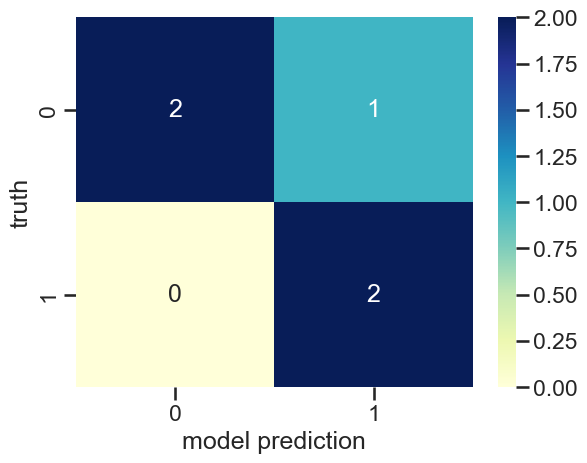

In [28]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


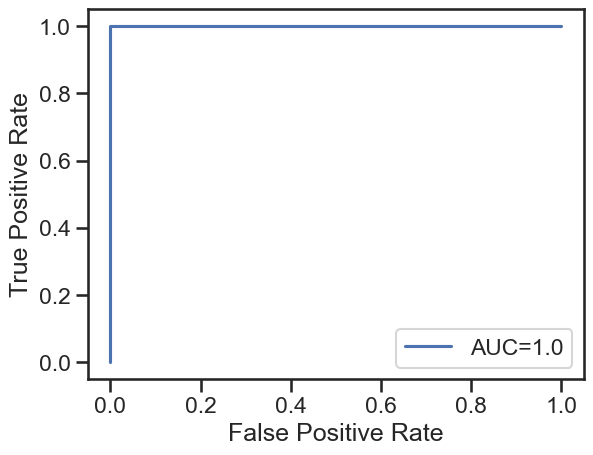

In [21]:
y_pred_proba = preeclampsia_t1_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_P1 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_P1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [264]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [265]:
preeclampsia_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [266]:
Y = preeclampsia_firstT_diffe_samples[["preeclampsia"]].values
X = preeclampsia_firstT_diffe_samples.loc[:, preeclampsia_firstT_diffe_samples.columns != "preeclampsia"].values

In [267]:
Y = Y.reshape(-1)

In [268]:
scores = cross_val_score(preeclampsia_t1_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
p1_cv = np.mean(scores)
p1_cv

0.7333333333333333

# Preeclampsia Trimester 2

## case: preeclampsia control: healthy pregnancy

In [269]:
second_trimester_data = read_counts.loc[read_counts["trimester"] == "2ndT"]
second_trimester_data.drop("trimester", axis=1, inplace=True)
second_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,Preeclampsia
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,Preeclampsia
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,Preeclampsia
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,Preeclampsia
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,Preeclampsia
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,Preeclampsia
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,Preeclampsia
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,Preeclampsia
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,Gestational-Diabetes
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,Gestational-Diabetes


In [270]:
second_trimester_data_copy = pd.read_csv("second_trimester_data.txt", sep="\t")
second_trimester_data_copy = second_trimester_data_copy.T
second_trimester_data_copy

,0,1,2,3,4,5,6,7,8,9,...,57726,57727,57728,57729,57730,57731,57732,57733,57734,57735
0,3,9,0,0,0,0,0,0,0,0,...,172,0,45,3,0,0,0,135,0,0
4,19,0,0,0,0,0,0,0,0,0,...,49,0,41,0,0,0,0,20,0,0
10,0,0,0,0,0,0,0,0,0,0,...,49,0,35,0,0,0,1,112,7,0
13,1,0,0,0,0,0,0,0,0,3,...,110,0,56,0,0,0,21,171,0,0
23,9,0,0,0,0,0,0,0,0,2,...,3,0,31,0,0,0,1,107,0,0
24,0,8,0,0,0,0,0,0,0,0,...,66,0,38,0,0,0,0,98,0,0
31,0,0,0,0,3,0,0,0,0,0,...,54,0,31,0,0,0,13,135,0,0
34,1,0,0,0,8,0,0,0,0,0,...,51,0,38,1,0,0,6,74,2,0
42,0,5,0,0,0,0,0,0,0,0,...,53,0,72,0,0,0,0,110,0,0
48,0,0,0,0,2,0,0,0,0,0,...,65,0,16,0,0,0,10,76,0,0


In [271]:
second_trimester_diseases = pd.read_csv("first_trimester_diseases.txt", sep="\t")
second_trimester_diseases

,disease
0,Preeclampsia
1,Preeclampsia
2,Preeclampsia
3,Preeclampsia
4,Preeclampsia
5,Preeclampsia
6,Preeclampsia
7,Preeclampsia
8,Gestational-Diabetes
9,Gestational-Diabetes


In [272]:
second_trimester_data["preeclampsia"] = np.where(second_trimester_data.disease.str.contains("Preeclampsia"), 1, 0)
preeclampsia_secondT = second_trimester_data[(second_trimester_data.disease == "Normal-Pregnancy")| (second_trimester_data.disease == "Preeclampsia")]
preeclampsia_secondT = preeclampsia_secondT.drop("disease", axis=1)
preeclampsia_secondT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,preeclampsia
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,1
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,1
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,1
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,1
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,1
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,1
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,1
82,0,12,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,60,0,0,0
87,0,0,0,0,3,0,0,0,0,0,...,0,23,0,0,2,1,90,0,0,0


## differential expression

In [273]:
preeclampsia_dif_exp_secondT = pd.read_csv("preeclamspsia_diffe_secondT.txt", sep=" ")
preeclampsia_dif_exp_secondT = preeclampsia_dif_exp_secondT[preeclampsia_dif_exp_secondT["PValue"] < 0.05]
preeclampsia_dif_exp_secondT

,logFC,logCPM,PValue
1,-3.525107,1.590729,0.018278
11,-2.675605,2.563675,0.042416
15,3.652402,1.796599,0.049773
36,4.555321,9.880109,0.000364
50,4.984551,1.280439,0.042248
...,...,...,...
57633,3.570825,1.580624,0.019455
57642,-3.518724,0.912322,0.042480
57657,-2.692300,1.009396,0.047532
57678,5.302007,1.853951,0.001911


In [274]:
preeclampsia_dif_exp_secondT = list(preeclampsia_dif_exp_secondT.index)
preeclampsia_dif_exp_secondT = [str(i) for i in preeclampsia_dif_exp_secondT]
preeclampsia_dif_exp_secondT

['1',
 '11',
 '15',
 '36',
 '50',
 '57',
 '81',
 '113',
 '124',
 '132',
 '151',
 '186',
 '251',
 '307',
 '324',
 '391',
 '394',
 '502',
 '564',
 '647',
 '676',
 '702',
 '711',
 '752',
 '798',
 '823',
 '858',
 '876',
 '883',
 '908',
 '1067',
 '1140',
 '1198',
 '1245',
 '1247',
 '1350',
 '1462',
 '1614',
 '1675',
 '1744',
 '1747',
 '1793',
 '1960',
 '2032',
 '2083',
 '2097',
 '2157',
 '2160',
 '2169',
 '2171',
 '2190',
 '2240',
 '2269',
 '2287',
 '2326',
 '2445',
 '2480',
 '2489',
 '2538',
 '2629',
 '2661',
 '2670',
 '2686',
 '2692',
 '2762',
 '2828',
 '2841',
 '2869',
 '3071',
 '3100',
 '3137',
 '3144',
 '3195',
 '3241',
 '3244',
 '3246',
 '3275',
 '3317',
 '3356',
 '3360',
 '3401',
 '3422',
 '3429',
 '3461',
 '3548',
 '3637',
 '3732',
 '3854',
 '4080',
 '4105',
 '4119',
 '4131',
 '4266',
 '4284',
 '4302',
 '4351',
 '4466',
 '4483',
 '4488',
 '4500',
 '4507',
 '4562',
 '4649',
 '4744',
 '4746',
 '4767',
 '4835',
 '4852',
 '4925',
 '4980',
 '4988',
 '5008',
 '5028',
 '5050',
 '5059',
 '5

In [275]:
preeclampsia_secondT_diffe_samples = preeclampsia_secondT[preeclampsia_dif_exp_secondT]
preeclampsia_secondT_diffe_samples = preeclampsia_secondT_diffe_samples.join(preeclampsia_secondT["preeclampsia"])
preeclampsia_secondT_diffe_samples

,1,11,15,36,50,57,81,113,124,132,...,57384,57411,57450,57591,57633,57642,57657,57678,57680,preeclampsia
0,9,0,0,104,2,0,7,0,0,0,...,0,0,0,152,0,0,0,0,1,1
4,0,0,0,7,0,0,1,0,0,0,...,0,0,0,31,1,0,0,0,0,1
10,0,0,0,342,0,0,1,0,0,0,...,0,0,0,48,0,7,0,0,0,1
13,0,0,0,12948,1,1,0,0,0,1,...,0,0,0,76,0,3,0,0,0,1
23,0,0,0,105,0,0,0,0,0,0,...,0,0,0,32,0,0,0,0,0,1
24,8,0,0,208,0,0,0,0,0,0,...,0,0,0,59,0,0,0,0,0,1
31,0,0,0,212,5,3,2,0,0,0,...,0,0,0,91,0,1,0,1,1,1
34,0,0,0,41,8,1,5,0,0,0,...,0,1,0,63,2,1,0,0,1,1
82,12,0,0,427,0,0,0,0,0,0,...,0,0,0,51,0,0,0,0,0,0
87,0,0,0,32,0,1,0,0,0,0,...,0,0,0,44,0,4,3,0,0,0


## logistic regression model for dataset above

In [276]:
Y = preeclampsia_secondT_diffe_samples[["preeclampsia"]]
X = preeclampsia_secondT_diffe_samples.loc[:, preeclampsia_secondT_diffe_samples.columns != "preeclampsia"]

In [277]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [278]:
y_test["preeclampsia"].value_counts(normalize=True) 

1    0.5
0    0.5
Name: preeclampsia, dtype: float64

In [279]:
y_train["preeclampsia"].value_counts(normalize=True) 

0    0.545455
1    0.454545
Name: preeclampsia, dtype: float64

In [280]:
preeclampsia_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [281]:
preeclampsia_t2_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [282]:
y_pred = preeclampsia_t2_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [45]:
accuracy_score(y_test, y_pred)

0.5

In [46]:
mean_squared_error(y_test, y_pred)

0.5

## heatmap

In [52]:
predictions = preeclampsia_t2_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 1., 1., 0., 1.])

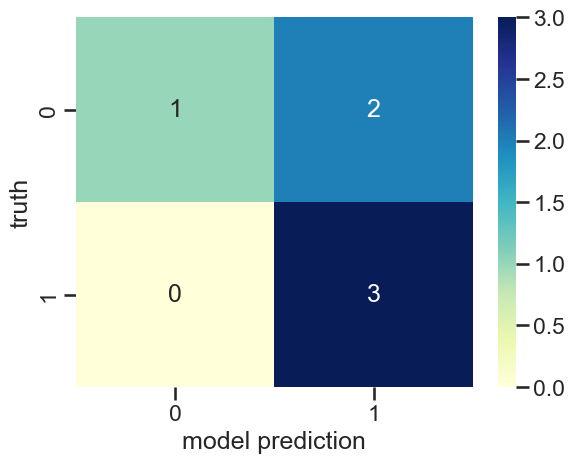

In [53]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


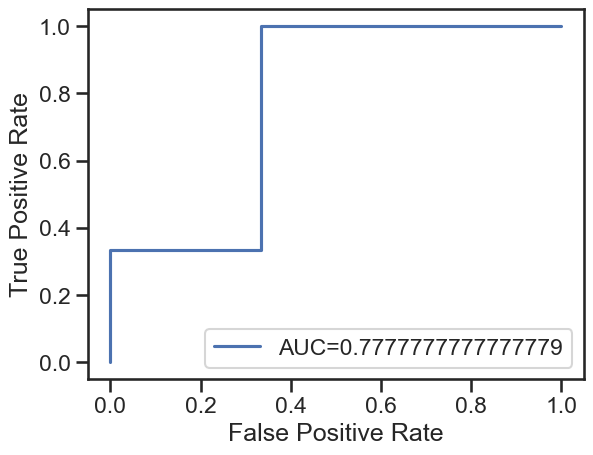

In [104]:
y_pred_proba = preeclampsia_t2_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_P2 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_P2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [283]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [284]:
preeclampsia_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [285]:
Y = preeclampsia_secondT_diffe_samples[["preeclampsia"]].values
X = preeclampsia_secondT_diffe_samples.loc[:, preeclampsia_secondT_diffe_samples.columns != "preeclampsia"].values

In [286]:
Y = Y.reshape(-1)

In [287]:
scores = cross_val_score(preeclampsia_t2_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
p2_cv = np.mean(scores)
p2_cv

0.46875

# Preeclampsia Trimester 3

## case: preeclampsia control: healthy pregnancy

In [288]:
third_trimester_data = read_counts.loc[read_counts["trimester"] == "3rdT"]
third_trimester_data.drop("trimester", axis=1, inplace=True)
third_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,Preeclampsia
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,Preeclampsia
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,Preeclampsia
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,Preeclampsia
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,Preeclampsia
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,Preeclampsia
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,Preeclampsia
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,Preeclampsia
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,Gestational-Diabetes
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,Gestational-Diabetes


In [289]:
third_trimester_data_copy = pd.read_csv("third_trimester_data.txt", sep="\t")
third_trimester_data_copy = third_trimester_data_copy.T
third_trimester_data_copy

,0,1,2,3,4,5,6,7,8,9,...,57726,57727,57728,57729,57730,57731,57732,57733,57734,57735
11,0,0,0,0,0,0,0,3,0,0,...,52,0,5,0,0,0,3,46,1,0
12,0,0,1,0,5,0,0,2,0,2,...,85,0,35,0,0,1,9,127,0,0
14,0,4,0,0,0,0,0,0,0,0,...,127,0,42,0,0,0,0,213,3,0
15,1,0,0,0,2,0,0,0,0,2,...,115,2,59,0,0,0,11,123,0,0
29,0,1,0,0,0,5,1,2,0,0,...,98,4,83,0,0,4,13,74,10,0
33,0,0,0,0,0,0,0,0,0,0,...,72,0,51,0,0,0,6,175,0,0
35,34,2,0,0,0,0,0,0,0,4,...,36,0,11,0,0,0,1,109,1,0
36,0,0,0,0,0,0,0,0,0,2,...,51,8,47,0,0,0,1,122,0,0
40,1,0,0,0,0,0,0,0,0,0,...,110,0,20,0,0,0,3,71,0,0
46,2,8,0,0,0,0,0,0,0,0,...,98,0,29,0,0,0,0,116,0,0


In [290]:
third_trimester_diseases = pd.read_csv("third_trimester_diseases.txt", sep="\t")
third_trimester_diseases

,disease
0,Preeclampsia
1,Preeclampsia
2,Preeclampsia
3,Preeclampsia
4,Preeclampsia
5,Preeclampsia
6,Preeclampsia
7,Preeclampsia
8,Gestational-Diabetes
9,Gestational-Diabetes


In [291]:
third_trimester_data["preeclampsia"] = np.where(third_trimester_data.disease.str.contains("Preeclampsia"), 1, 0)
preeclampsia_thirdT = third_trimester_data[(third_trimester_data.disease == "Normal-Pregnancy")| (third_trimester_data.disease == "Preeclampsia")]
preeclampsia_thirdT = preeclampsia_thirdT.drop("disease", axis=1)
preeclampsia_thirdT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,preeclampsia
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,1
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,1
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,1
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,1
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,1
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,1
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,1
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,1
81,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,6,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,40,0,0,0


## differential expression

In [292]:
preeclampsia_dif_exp_thirdT = pd.read_csv("preeclamspsia_diffe_thirdT.txt", sep=" ")
preeclampsia_dif_exp_thirdT = preeclampsia_dif_exp_thirdT[preeclampsia_dif_exp_thirdT["PValue"] < 0.05]
preeclampsia_dif_exp_thirdT

,logFC,logCPM,PValue
35,3.785983,7.587090,0.000810
36,3.469072,8.204059,0.000178
55,-4.130930,0.988338,0.023017
56,-2.269121,1.401286,0.046918
58,-2.714558,1.418684,0.031237
...,...,...,...
57681,-3.617769,1.315715,0.008822
57705,-4.415154,1.432204,0.000135
57710,-3.418465,0.761950,0.013641
57726,-1.296859,3.469206,0.038172


In [293]:
preeclampsia_dif_exp_thirdT = list(preeclampsia_dif_exp_thirdT.index)
preeclampsia_dif_exp_thirdT = [str(i) for i in preeclampsia_dif_exp_thirdT]
preeclampsia_dif_exp_thirdT

['35',
 '36',
 '55',
 '56',
 '58',
 '65',
 '69',
 '87',
 '89',
 '94',
 '96',
 '97',
 '103',
 '127',
 '137',
 '145',
 '158',
 '160',
 '173',
 '174',
 '175',
 '177',
 '182',
 '188',
 '191',
 '198',
 '220',
 '234',
 '240',
 '245',
 '247',
 '272',
 '276',
 '277',
 '279',
 '302',
 '304',
 '306',
 '307',
 '324',
 '348',
 '355',
 '356',
 '362',
 '378',
 '379',
 '393',
 '396',
 '407',
 '470',
 '481',
 '485',
 '508',
 '528',
 '535',
 '553',
 '556',
 '561',
 '570',
 '575',
 '587',
 '595',
 '596',
 '604',
 '639',
 '641',
 '642',
 '649',
 '667',
 '690',
 '707',
 '715',
 '721',
 '722',
 '736',
 '737',
 '753',
 '783',
 '790',
 '791',
 '810',
 '825',
 '836',
 '844',
 '854',
 '857',
 '867',
 '878',
 '883',
 '901',
 '953',
 '957',
 '960',
 '970',
 '981',
 '991',
 '993',
 '994',
 '998',
 '1000',
 '1018',
 '1029',
 '1063',
 '1085',
 '1098',
 '1101',
 '1103',
 '1144',
 '1155',
 '1196',
 '1205',
 '1211',
 '1238',
 '1248',
 '1266',
 '1285',
 '1296',
 '1305',
 '1328',
 '1340',
 '1345',
 '1346',
 '1355',
 '13

In [294]:
preeclampsia_thirdT_diffe_samples = preeclampsia_thirdT[preeclampsia_dif_exp_thirdT]
preeclampsia_thirdT_diffe_samples = preeclampsia_thirdT_diffe_samples.join(preeclampsia_thirdT["preeclampsia"])
preeclampsia_thirdT_diffe_samples

,35,36,55,56,58,65,69,87,89,94,...,57667,57668,57669,57678,57681,57705,57710,57726,57728,preeclampsia
11,22,21,1,4,0,0,1,2,1,9,...,0,1,1,1,2,0,0,52,5,1
12,146,172,15,20,0,1,8,1,4,30,...,2,6,1,1,0,0,2,85,35,1
14,12,23,0,6,0,0,1,0,1,71,...,0,2,0,0,0,0,0,127,42,1
15,93,91,8,15,0,0,8,2,1,40,...,1,4,1,1,1,1,0,115,59,1
29,28,34,3,52,1,0,7,10,11,26,...,7,3,0,4,11,1,3,98,83,1
33,213,3504,0,6,0,0,1,0,1,43,...,0,0,0,0,0,0,0,72,51,1
35,128,245,1,11,0,0,10,2,9,20,...,1,18,0,0,0,2,0,36,11,1
36,77,1133,0,60,0,0,1,0,0,25,...,0,6,0,0,0,3,0,51,47,1
81,15,37,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,3,0,0
86,26,34,0,2,0,0,3,0,0,25,...,0,0,0,0,0,0,0,74,9,0


## logistic regression model for dataset above

In [295]:
Y = preeclampsia_thirdT_diffe_samples[["preeclampsia"]]
X = preeclampsia_thirdT_diffe_samples.loc[:, preeclampsia_thirdT_diffe_samples.columns != "preeclampsia"]

In [296]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [297]:
y_test["preeclampsia"].value_counts(normalize=True) 

1    0.5
0    0.5
Name: preeclampsia, dtype: float64

In [298]:
y_train["preeclampsia"].value_counts(normalize=True) 

0    0.545455
1    0.454545
Name: preeclampsia, dtype: float64

In [299]:
preeclampsia_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [300]:
preeclampsia_t3_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [301]:
y_pred = preeclampsia_t3_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
accuracy_score(y_test, y_pred)

0.5

In [72]:
mean_squared_error(y_test, y_pred)

0.5

## heatmap

In [76]:
predictions = preeclampsia_t3_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 0., 1., 1., 1., 0.])

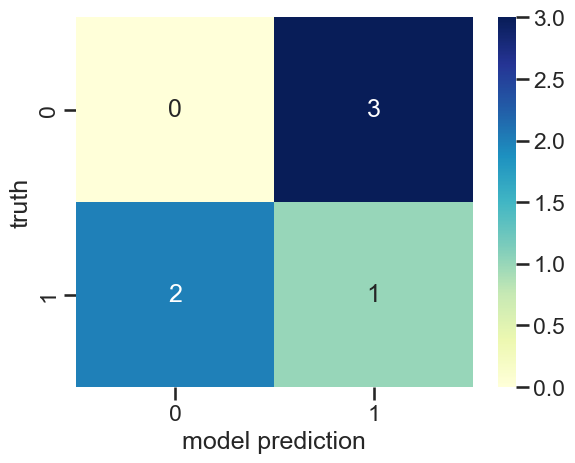

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


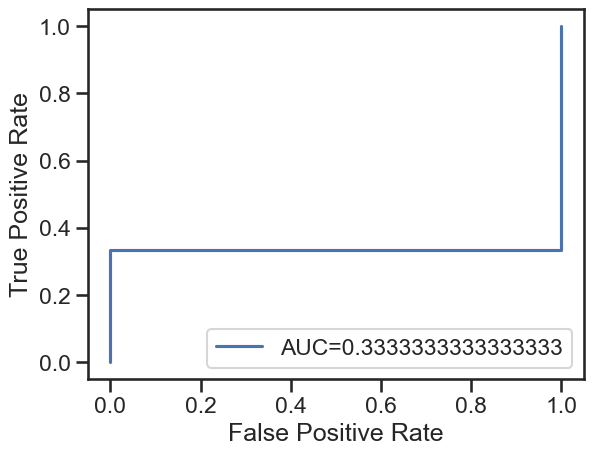

In [122]:
y_pred_proba = preeclampsia_t3_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_P3 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_P3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [302]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [303]:
preeclampsia_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [304]:
Y = preeclampsia_thirdT_diffe_samples[["preeclampsia"]].values
X = preeclampsia_thirdT_diffe_samples.loc[:, preeclampsia_thirdT_diffe_samples.columns != "preeclampsia"].values

In [305]:
Y = Y.reshape(-1)

In [306]:
scores = cross_val_score(preeclampsia_t3_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
p3_cv = np.mean(scores)
p3_cv

0.59375

## Preeclampsia AUC/ROC scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


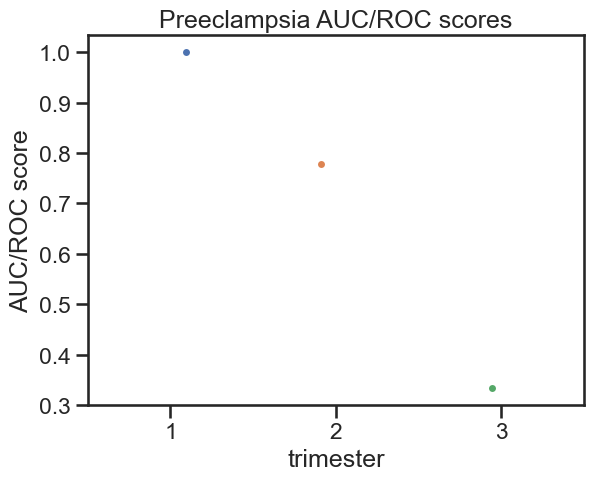

In [124]:
x =["1", "2", "3"]
y =[auc_P1, auc_P2, auc_P3]
  
auc_plot_P1 = sns.stripplot(x, y);
auc_plot_P1.set(xlabel ='trimester', ylabel ='AUC/ROC score')
  
plt.title('Preeclampsia AUC/ROC scores');
plt.show()

# Gestational Diabetes Trimester 1

## case: gestational diabetes control: healthy pregnancy

In [307]:
first_trimester_data["gestational_diabetes"] = np.where(first_trimester_data.disease.str.contains("Gestational-Diabetes"), 1, 0)
gestational_diabetes_firstT = first_trimester_data[(first_trimester_data.disease == "Normal-Pregnancy")| (first_trimester_data.disease == "Gestational-Diabetes")]
gestational_diabetes_firstT = gestational_diabetes_firstT.drop(["preeclampsia","disease"], axis=1)
gestational_diabetes_firstT

,0,1,2,3,4,5,6,7,8,9,...,57729,57730,57731,57732,57733,57734,57735,gestational_diabetes,chronic_hypertension,normal_pregnancy
43,0,5,0,0,0,0,0,0,0,1,...,0,0,0,0,65,0,0,1,0,0
44,11,0,0,0,0,0,0,0,0,0,...,0,0,0,4,95,1,0,1,0,0
49,0,1,0,0,2,0,0,1,0,2,...,4,0,2,2,82,0,0,1,0,0
56,0,0,0,0,6,0,0,0,0,0,...,0,0,1,8,131,0,0,1,0,0
66,13,0,0,0,4,0,0,0,0,1,...,0,0,0,19,105,3,0,1,0,0
70,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,36,0,0,1,0,0
71,8,3,0,0,0,0,0,0,0,0,...,0,0,0,0,70,0,0,1,0,0
83,0,0,0,0,0,0,0,0,0,1,...,0,0,0,28,371,8,0,0,0,1
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,146,0,0,0,0,1
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,44,0,0,0,0,1


## differential expression

In [308]:
gestational_diabetes_dif_exp_firstT = pd.read_csv("gestational_diabetes_diffe_firstT.txt", sep=" ")
gestational_diabetes_dif_exp_firstT = gestational_diabetes_dif_exp_firstT[gestational_diabetes_dif_exp_firstT["PValue"] < 0.05]
gestational_diabetes_dif_exp_firstT

,logFC,logCPM,PValue
15,2.532374,2.045980,0.007205
100,1.111257,4.674780,0.022451
108,1.631809,3.938910,0.024599
144,-4.321364,1.337799,0.020905
149,-1.684891,2.812308,0.034516
...,...,...,...
57696,-3.682110,0.856067,0.042106
57697,5.956304,1.491800,0.034057
57703,-2.291810,2.889762,0.009089
57723,-4.533424,1.029210,0.028892


In [309]:
gestational_diabetes_dif_exp_firstT = list(gestational_diabetes_dif_exp_firstT.index)
gestational_diabetes_dif_exp_firstT = [str(i) for i in gestational_diabetes_dif_exp_firstT]
gestational_diabetes_dif_exp_firstT

['15',
 '100',
 '108',
 '144',
 '149',
 '199',
 '208',
 '271',
 '306',
 '309',
 '337',
 '353',
 '382',
 '390',
 '392',
 '395',
 '516',
 '544',
 '545',
 '571',
 '684',
 '711',
 '737',
 '771',
 '798',
 '811',
 '891',
 '897',
 '929',
 '952',
 '953',
 '957',
 '1010',
 '1020',
 '1099',
 '1103',
 '1106',
 '1162',
 '1170',
 '1188',
 '1229',
 '1242',
 '1297',
 '1329',
 '1403',
 '1455',
 '1469',
 '1492',
 '1533',
 '1535',
 '1633',
 '1675',
 '1811',
 '1817',
 '1818',
 '1820',
 '1835',
 '1867',
 '1871',
 '1901',
 '1915',
 '1951',
 '1954',
 '1958',
 '1971',
 '2000',
 '2004',
 '2046',
 '2077',
 '2110',
 '2111',
 '2125',
 '2130',
 '2143',
 '2176',
 '2191',
 '2204',
 '2246',
 '2251',
 '2252',
 '2282',
 '2326',
 '2335',
 '2370',
 '2395',
 '2403',
 '2424',
 '2435',
 '2472',
 '2475',
 '2478',
 '2483',
 '2486',
 '2543',
 '2561',
 '2600',
 '2627',
 '2642',
 '2655',
 '2714',
 '2754',
 '2757',
 '2759',
 '2768',
 '2778',
 '2782',
 '2789',
 '2801',
 '2805',
 '2934',
 '2996',
 '3006',
 '3044',
 '3049',
 '3050'

In [310]:
gestational_diabetes_firstT_diffe_samples = gestational_diabetes_firstT[gestational_diabetes_dif_exp_firstT]
gestational_diabetes_firstT_diffe_samples = gestational_diabetes_firstT_diffe_samples.join(gestational_diabetes_firstT["gestational_diabetes"])
gestational_diabetes_firstT_diffe_samples

,15,100,108,144,149,199,208,271,306,309,...,57613,57667,57675,57681,57696,57697,57703,57723,57734,gestational_diabetes
43,0,0,6,2,3,0,0,0,5,0,...,0,0,17,0,0,17,0,0,0,1
44,0,1,4,7,35,3,0,1,21,0,...,0,0,4,3,0,23,0,3,1,1
49,0,0,5,3,1,0,0,0,25,0,...,3,0,0,4,0,3,2,4,0,1
56,0,0,6,8,6,0,0,9,39,0,...,0,0,0,0,0,0,0,0,0,1
66,0,0,1,0,0,0,0,1,66,0,...,0,0,7,0,0,1,0,0,3,1
70,0,0,0,2,0,0,0,0,6,0,...,0,0,3,0,0,0,0,0,0,1
71,0,0,1,0,0,0,0,4,13,0,...,0,0,5,0,0,0,0,0,0,1
83,0,5,29,0,0,0,0,1,24,0,...,0,0,65,0,0,57,0,1,8,0
89,0,0,5,1,1,7,0,5,8,0,...,0,0,1,0,25,5,0,0,0,0
92,0,0,38,0,0,0,0,0,4,0,...,0,0,58,0,0,6,9,0,0,0


## logistic regression model for dataset above

In [311]:
Y = gestational_diabetes_firstT_diffe_samples[["gestational_diabetes"]]
X = gestational_diabetes_firstT_diffe_samples.loc[:, gestational_diabetes_firstT_diffe_samples.columns != "gestational_diabetes"]

In [312]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [313]:
y_test["gestational_diabetes"].value_counts(normalize=True) 

0    0.6
1    0.4
Name: gestational_diabetes, dtype: float64

In [314]:
y_train["gestational_diabetes"].value_counts(normalize=True) 

0    0.5
1    0.5
Name: gestational_diabetes, dtype: float64

In [315]:
gestational_diabetes_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
gestational_diabetes_t1_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [316]:
y_pred = gestational_diabetes_t1_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [317]:
accuracy_score(y_test, y_pred)

0.2

In [89]:
mean_squared_error(y_test, y_pred)

0.8

## heatmap

In [139]:
predictions = gestational_diabetes_t1_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0., 1., 0.])

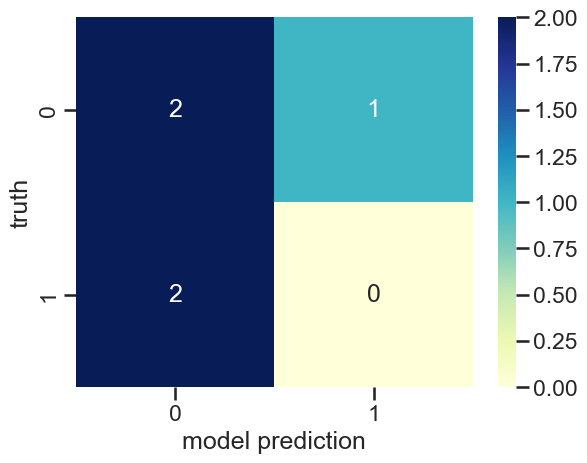

In [140]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


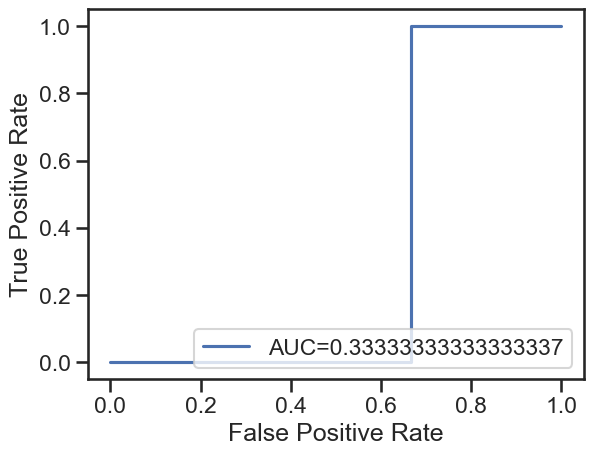

In [141]:
y_pred_proba = gestational_diabetes_t1_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_GD1 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_GD1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [318]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [319]:
gestational_diabetes_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [320]:
Y = gestational_diabetes_firstT_diffe_samples[["gestational_diabetes"]].values
X = gestational_diabetes_firstT_diffe_samples.loc[:, gestational_diabetes_firstT_diffe_samples.columns != "gestational_diabetes"].values

In [321]:
Y = Y.reshape(-1)

In [322]:
scores = cross_val_score(gestational_diabetes_t1_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
gd1_cv = np.mean(scores)
gd1_cv

0.5714285714285714

# Gestational Diabetes Trimester 2

## case: gestational diabetes control: healthy pregnancy

In [323]:
second_trimester_data["gestational_diabetes"] = np.where(second_trimester_data.disease.str.contains("Gestational-Diabetes"), 1, 0)
gestational_diabetes_secondT = second_trimester_data[(second_trimester_data.disease == "Normal-Pregnancy")| (second_trimester_data.disease == "Gestational-Diabetes")]
gestational_diabetes_secondT = gestational_diabetes_secondT.drop(["disease", "preeclampsia"], axis=1)
gestational_diabetes_secondT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,gestational_diabetes
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,1
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,1
57,2,0,0,0,15,0,0,0,0,1,...,0,39,0,0,0,8,146,1,0,1
58,0,0,0,0,9,1,0,0,0,0,...,0,14,0,0,0,4,49,3,0,1
60,0,0,0,0,0,0,0,0,0,0,...,0,58,0,0,0,0,1,0,0,1
63,0,0,0,0,0,0,0,0,0,0,...,0,61,0,0,0,0,102,0,0,1
65,0,0,0,0,0,0,0,0,0,1,...,0,17,0,0,0,1,157,0,0,1
82,0,12,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,60,0,0,0
87,0,0,0,0,3,0,0,0,0,0,...,0,23,0,0,2,1,90,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,1,28,0,0,0,12,109,0,0,0


## differential expression

In [324]:
gestational_diabetes_dif_exp_secondT = pd.read_csv("gestational_diabetes_diffe_secondT.txt", sep=" ")
gestational_diabetes_dif_exp_secondT = gestational_diabetes_dif_exp_secondT[gestational_diabetes_dif_exp_secondT["PValue"] < 0.05]
gestational_diabetes_dif_exp_secondT

,logFC,logCPM,PValue
11,-3.592455,2.563675,0.007912
35,3.566066,9.811711,0.040803
36,5.162050,9.880109,0.000240
37,3.256076,9.470894,0.004243
88,-4.288338,1.165709,0.017673
...,...,...,...
57517,-4.417705,1.164764,0.045697
57624,5.870535,1.901446,0.009124
57625,-4.261811,1.109809,0.024241
57675,0.744486,6.886460,0.028887


In [325]:
gestational_diabetes_dif_exp_secondT = list(gestational_diabetes_dif_exp_secondT.index)
gestational_diabetes_dif_exp_secondT = [str(i) for i in gestational_diabetes_dif_exp_secondT]
gestational_diabetes_dif_exp_secondT

['11',
 '35',
 '36',
 '37',
 '88',
 '236',
 '240',
 '338',
 '358',
 '383',
 '385',
 '502',
 '577',
 '647',
 '659',
 '711',
 '809',
 '823',
 '844',
 '856',
 '868',
 '899',
 '918',
 '947',
 '953',
 '1067',
 '1247',
 '1356',
 '1558',
 '1577',
 '1614',
 '1639',
 '1660',
 '1774',
 '1776',
 '1785',
 '1827',
 '1901',
 '1960',
 '2083',
 '2169',
 '2255',
 '2281',
 '2308',
 '2384',
 '2445',
 '2457',
 '2465',
 '2527',
 '2593',
 '2629',
 '2669',
 '2738',
 '2762',
 '2945',
 '3071',
 '3104',
 '3137',
 '3138',
 '3241',
 '3246',
 '3258',
 '3268',
 '3356',
 '3382',
 '3403',
 '3422',
 '3441',
 '3489',
 '3548',
 '3563',
 '3637',
 '3750',
 '3789',
 '3817',
 '3821',
 '3822',
 '3867',
 '3988',
 '4018',
 '4027',
 '4222',
 '4266',
 '4421',
 '4422',
 '4500',
 '4504',
 '4507',
 '4562',
 '4605',
 '4621',
 '4649',
 '4721',
 '4783',
 '4812',
 '4834',
 '4866',
 '4939',
 '4950',
 '4968',
 '4988',
 '5014',
 '5040',
 '5084',
 '5096',
 '5207',
 '5269',
 '5409',
 '5584',
 '5598',
 '5612',
 '5634',
 '5808',
 '5822',
 '58

In [326]:
gestational_diabetes_secondT_diffe_samples = gestational_diabetes_secondT[gestational_diabetes_dif_exp_secondT]
gestational_diabetes_secondT_diffe_samples = gestational_diabetes_secondT_diffe_samples.join(gestational_diabetes_secondT["gestational_diabetes"])
gestational_diabetes_secondT_diffe_samples

,11,35,36,37,88,236,240,338,358,383,...,57211,57384,57410,57504,57517,57624,57625,57675,57729,gestational_diabetes
42,0,46,134,10,0,0,0,0,0,8,...,0,0,2,0,51,10,0,1,0,1
48,0,105,109,28,0,2,0,0,0,9,...,0,1,0,0,57,0,0,2,0,1
57,0,85,78,9,0,41,0,1,0,43,...,0,0,5,0,108,3,0,12,0,1
58,0,31,19,4,1,4,0,0,0,10,...,0,0,12,0,14,1,6,3,0,1
60,0,196,229,49,0,0,0,0,0,0,...,0,0,0,0,24,0,0,0,0,1
63,0,16,37,6,0,0,0,0,0,4,...,0,0,0,0,1,0,0,1,0,1
65,0,30,78,10,0,0,0,0,0,40,...,0,0,2,0,71,0,0,12,0,1
82,0,17,427,1,0,4,0,0,0,1,...,0,0,19,0,20,0,0,0,0,0
87,0,6,32,2,0,0,0,0,0,1,...,0,0,8,0,16,0,0,2,0,0
88,0,34970,10706,627,0,24,0,0,0,23,...,0,0,9,0,448,0,0,7,0,0


## logistic regression for the dataset above

In [327]:
Y = gestational_diabetes_secondT_diffe_samples[["gestational_diabetes"]]
X = gestational_diabetes_secondT_diffe_samples.loc[:, gestational_diabetes_secondT_diffe_samples.columns != "gestational_diabetes"]

In [328]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [329]:
y_test["gestational_diabetes"].value_counts(normalize=True) 

1    0.6
0    0.4
Name: gestational_diabetes, dtype: float64

In [330]:
y_train["gestational_diabetes"].value_counts(normalize=True) 

0    0.636364
1    0.363636
Name: gestational_diabetes, dtype: float64

In [331]:
gestational_diabetes_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
gestational_diabetes_t2_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [332]:
y_pred = gestational_diabetes_t2_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [333]:
accuracy_score(y_test, y_pred)

0.4

In [110]:
mean_squared_error(y_test, y_pred)

0.6

## heatmap

In [160]:
predictions = gestational_diabetes_t2_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 0., 1., 1., 0.])

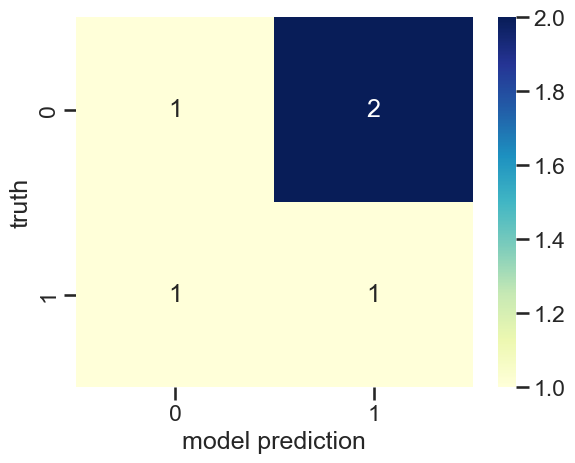

In [161]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


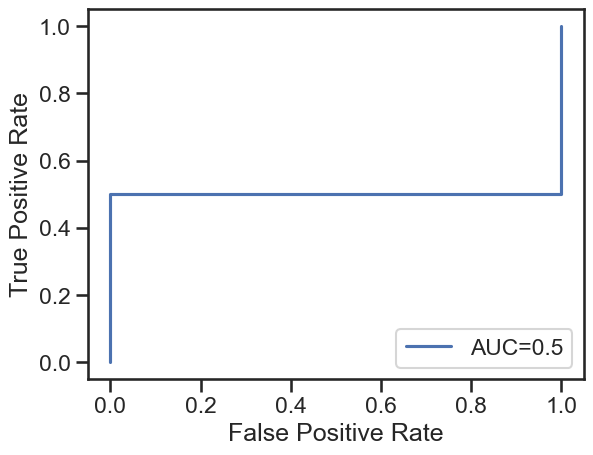

In [163]:
y_pred_proba = gestational_diabetes_t2_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_GD2 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_GD2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [334]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [335]:
gestational_diabetes_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [336]:
Y = gestational_diabetes_secondT_diffe_samples[["gestational_diabetes"]].values
X = gestational_diabetes_secondT_diffe_samples.loc[:, gestational_diabetes_secondT_diffe_samples.columns != "gestational_diabetes"].values

In [337]:
Y = Y.reshape(-1)

In [339]:
scores = cross_val_score(gestational_diabetes_t2_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
gd2_cv = np.mean(scores)
gd2_cv

0.6333333333333333

# Gestational Diabetes Trimester 3

## case: gestational diabetes control: healthy pregnancy

In [340]:
third_trimester_data["gestational_diabetes"] = np.where(third_trimester_data.disease.str.contains("Gestational-Diabetes"), 1, 0)
gestational_diabetes_thirdT = third_trimester_data[(third_trimester_data.disease == "Normal-Pregnancy")| (third_trimester_data.disease == "Gestational-Diabetes")]
gestational_diabetes_thirdT = gestational_diabetes_thirdT.drop(["disease", "preeclampsia"], axis=1)
gestational_diabetes_thirdT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,gestational_diabetes
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,1
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,1
55,1,0,0,0,0,0,0,0,0,1,...,0,18,0,0,0,0,37,0,0,1
68,43,0,0,0,9,0,0,0,0,1,...,0,2,0,0,0,5,77,0,0,1
69,4,1,0,0,4,0,0,0,0,1,...,3,22,0,0,0,0,50,5,0,1
72,0,5,0,0,1,0,0,0,0,0,...,0,18,0,0,0,1,69,0,0,1
81,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,6,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,40,0,0,0
96,0,2,0,0,0,0,0,0,0,0,...,0,53,0,0,0,3,102,1,0,0
101,0,2,0,0,0,0,0,0,0,2,...,0,272,0,0,0,30,570,0,0,0


## differential expression

In [341]:
gestational_diabetes_dif_exp_thirdT = pd.read_csv("gestational_diabetes_diffe_thirdT.txt", sep=" ")
gestational_diabetes_dif_exp_thirdT = gestational_diabetes_dif_exp_thirdT[gestational_diabetes_dif_exp_thirdT["PValue"] < 0.05]
gestational_diabetes_dif_exp_thirdT

,logFC,logCPM,PValue
20,-3.076960,1.025488,0.021320
35,4.792595,7.587090,0.000458
36,3.869336,8.204059,0.000333
37,3.163468,9.100483,0.002940
69,-3.222827,2.326332,0.013481
...,...,...,...
57627,-1.736293,2.992119,0.025964
57642,-3.133894,0.950271,0.024874
57692,-3.976743,1.320050,0.003766
57722,1.209193,4.991245,0.012549


In [342]:
gestational_diabetes_dif_exp_thirdT = list(gestational_diabetes_dif_exp_thirdT.index)
gestational_diabetes_dif_exp_thirdT = [str(i) for i in gestational_diabetes_dif_exp_thirdT]
gestational_diabetes_dif_exp_thirdT

['20',
 '35',
 '36',
 '37',
 '69',
 '71',
 '87',
 '89',
 '96',
 '99',
 '104',
 '109',
 '132',
 '140',
 '175',
 '177',
 '184',
 '191',
 '276',
 '307',
 '312',
 '325',
 '335',
 '356',
 '362',
 '383',
 '479',
 '512',
 '515',
 '548',
 '587',
 '595',
 '596',
 '604',
 '605',
 '635',
 '641',
 '662',
 '690',
 '708',
 '736',
 '772',
 '790',
 '809',
 '857',
 '878',
 '879',
 '900',
 '917',
 '936',
 '953',
 '956',
 '957',
 '967',
 '993',
 '1085',
 '1133',
 '1152',
 '1173',
 '1184',
 '1196',
 '1238',
 '1259',
 '1302',
 '1305',
 '1318',
 '1438',
 '1446',
 '1488',
 '1583',
 '1614',
 '1633',
 '1637',
 '1651',
 '1654',
 '1662',
 '1705',
 '1714',
 '1726',
 '1775',
 '1820',
 '1834',
 '1860',
 '1867',
 '1873',
 '1963',
 '2031',
 '2039',
 '2040',
 '2077',
 '2104',
 '2143',
 '2158',
 '2213',
 '2240',
 '2297',
 '2329',
 '2333',
 '2336',
 '2353',
 '2358',
 '2372',
 '2376',
 '2380',
 '2388',
 '2402',
 '2444',
 '2449',
 '2475',
 '2514',
 '2523',
 '2526',
 '2536',
 '2544',
 '2576',
 '2582',
 '2591',
 '2619',
 '2

In [343]:
gestational_diabetes_thirdT_diffe_samples = gestational_diabetes_thirdT[gestational_diabetes_dif_exp_thirdT]
gestational_diabetes_thirdT_diffe_samples = gestational_diabetes_thirdT_diffe_samples.join(gestational_diabetes_thirdT["gestational_diabetes"])
gestational_diabetes_thirdT_diffe_samples

,20,35,36,37,69,71,87,89,96,99,...,57582,57602,57618,57626,57627,57642,57692,57722,57726,gestational_diabetes
40,0,11,21,3,2,3,3,0,0,11,...,0,0,0,27,0,2,0,0,110,1
46,0,176,398,60,0,1,0,0,0,19,...,0,0,0,5,0,0,0,0,98,1
55,0,7,37,3,2,0,0,0,0,7,...,0,0,0,1,1,0,0,0,19,1
68,0,48,47,12,1,0,3,2,2,8,...,0,0,0,5,3,0,0,0,42,1
69,0,40,17,13,3,3,3,2,4,14,...,2,1,1,5,1,1,2,0,47,1
72,0,29,35,7,0,4,0,0,0,34,...,0,5,0,7,1,0,0,0,65,1
81,0,15,37,4,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,3,0
86,0,26,34,6,3,0,0,0,0,18,...,0,0,0,1,0,0,0,0,74,0
96,0,8905,3343,145,7,2,0,2,1,48,...,0,0,0,11,0,0,0,0,95,0
101,0,277,757,53,0,22,0,6,0,173,...,0,0,0,1,0,14,0,0,442,0


## logistic regression for the dataset above

In [344]:
Y = gestational_diabetes_thirdT_diffe_samples[["gestational_diabetes"]]
X = gestational_diabetes_thirdT_diffe_samples.loc[:, gestational_diabetes_thirdT_diffe_samples.columns != "gestational_diabetes"]

In [345]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [346]:
y_test["gestational_diabetes"].value_counts(normalize=True) 

0    0.6
1    0.4
Name: gestational_diabetes, dtype: float64

In [347]:
y_train["gestational_diabetes"].value_counts(normalize=True) 

0    0.6
1    0.4
Name: gestational_diabetes, dtype: float64

In [348]:
gestational_diabetes_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
gestational_diabetes_t3_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [349]:
accuracy_score(y_test, y_pred)

0.2

In [126]:
mean_squared_error(y_test, y_pred)

0.8

## heatmap

In [180]:
predictions = gestational_diabetes_t3_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 1., 0., 0., 0.])

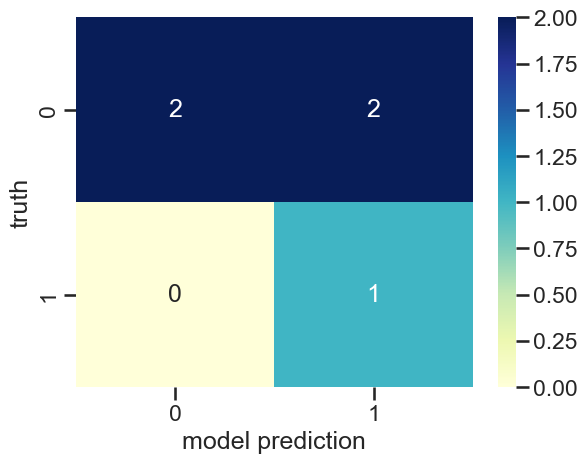

In [181]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


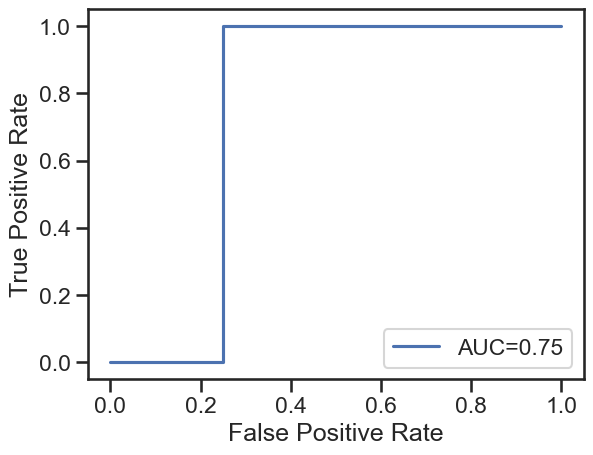

In [182]:
y_pred_proba = gestational_diabetes_t3_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_GD3 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_GD3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [350]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [351]:
gestational_diabetes_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000) 

In [352]:
Y = gestational_diabetes_thirdT_diffe_samples[["gestational_diabetes"]].values
X = gestational_diabetes_thirdT_diffe_samples.loc[:, gestational_diabetes_thirdT_diffe_samples.columns != "gestational_diabetes"].values

In [353]:
Y = Y.reshape(-1)

In [354]:
scores = cross_val_score(gestational_diabetes_t3_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
gd3_cv = np.mean(scores)
gd3_cv

0.5

# Gestational Diabetes AUC/ROC scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


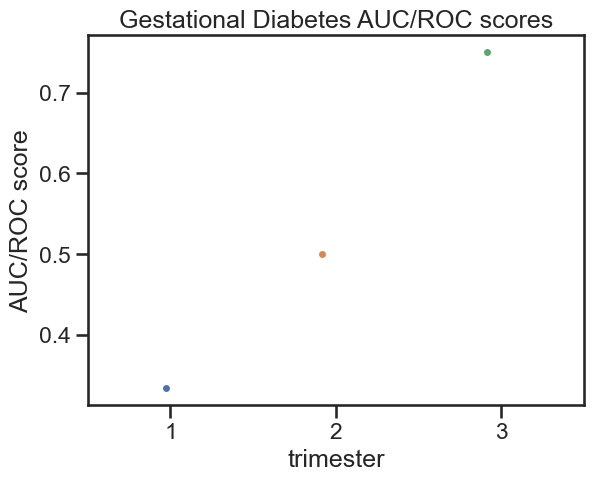

In [188]:
x =["1", "2", "3"]
y =[auc_GD1, auc_GD2, auc_GD3]
  
auc_plot_P1 = sns.stripplot(x, y);
auc_plot_P1.set(xlabel ='trimester', ylabel ='AUC/ROC score')
  
plt.title('Gestational Diabetes AUC/ROC scores');
plt.show()

# Chronic Hypertension Trimester 1

## case: chronic hypertension control: healthy pregnancy

In [355]:
## case: gestational diabetes control: healthy pregnancyfirst_trimester_data["chronic_hypertension"] = np.where(first_trimester_data.disease.str.contains("Chronic-Hypertension"), 1, 0)
chronic_hypertension_firstT = first_trimester_data[(first_trimester_data.disease == "Normal-Pregnancy")| (first_trimester_data.disease == "Chronic-Hypertension")]
chronic_hypertension_firstT = chronic_hypertension_firstT.drop(["disease", "preeclampsia", "gestational_diabetes"], axis=1)
chronic_hypertension_firstT

,0,1,2,3,4,5,6,7,8,9,...,57728,57729,57730,57731,57732,57733,57734,57735,chronic_hypertension,normal_pregnancy
83,0,0,0,0,0,0,0,0,0,1,...,224,0,0,0,28,371,8,0,0,1
89,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,146,0,0,0,1
92,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,44,0,0,0,1
99,0,0,0,0,5,0,0,0,0,0,...,44,0,0,0,3,121,8,0,0,1
108,0,1,0,0,1,0,0,0,0,1,...,34,0,0,0,4,153,0,0,0,1
114,31,0,0,0,0,0,0,0,0,0,...,79,0,0,0,34,251,8,0,0,1
117,31,2,0,0,0,0,0,0,0,5,...,224,9,1,1,10,577,13,0,0,1
118,0,0,0,0,2,0,0,0,0,4,...,33,7,0,0,18,116,0,0,0,1
124,0,0,0,0,0,0,0,0,0,0,...,44,0,0,0,8,73,4,0,1,0
130,0,4,0,0,0,0,0,0,0,0,...,75,0,0,0,30,134,0,0,1,0


## differential expression

In [356]:
chronic_hypertension_dif_exp_firstT = pd.read_csv("chronic_hypertension_diffe_firstT.txt", sep=" ")
chronic_hypertension_dif_exp_firstT = chronic_hypertension_dif_exp_firstT[chronic_hypertension_dif_exp_firstT["PValue"] < 0.05]
chronic_hypertension_dif_exp_firstT

,logFC,logCPM,PValue
35,-3.665516,7.372103,0.004269
36,-3.741230,8.313645,0.000127
118,-2.749660,2.362439,0.014098
193,6.080735,2.253410,0.035668
236,-2.580978,1.695108,0.031128
...,...,...,...
57080,-4.408300,0.746792,0.039676
57307,-5.699946,1.108373,0.009872
57453,-4.974962,0.812097,0.010888
57533,-5.550681,0.893334,0.012780


In [357]:
chronic_hypertension_dif_exp_firstT = list(chronic_hypertension_dif_exp_firstT.index)
chronic_hypertension_dif_exp_firstT = [str(i) for i in chronic_hypertension_dif_exp_firstT]
chronic_hypertension_dif_exp_firstT

['35',
 '36',
 '118',
 '193',
 '236',
 '332',
 '367',
 '574',
 '878',
 '951',
 '1099',
 '1329',
 '1401',
 '1428',
 '1651',
 '2006',
 '2102',
 '2450',
 '2475',
 '2486',
 '2502',
 '2510',
 '2627',
 '2805',
 '3006',
 '3062',
 '3411',
 '3527',
 '3595',
 '4452',
 '4507',
 '4525',
 '4528',
 '4549',
 '5027',
 '5122',
 '5232',
 '5257',
 '5286',
 '5335',
 '5365',
 '5434',
 '5584',
 '5726',
 '5963',
 '5995',
 '6244',
 '6334',
 '6424',
 '6536',
 '6677',
 '6772',
 '6819',
 '6864',
 '6932',
 '7014',
 '7259',
 '7519',
 '7527',
 '7670',
 '7680',
 '7695',
 '7725',
 '7964',
 '8211',
 '8303',
 '8553',
 '8565',
 '8736',
 '8747',
 '8751',
 '8805',
 '9000',
 '9095',
 '9116',
 '9202',
 '9388',
 '9833',
 '9881',
 '9897',
 '9958',
 '9988',
 '9998',
 '10086',
 '10300',
 '10417',
 '10878',
 '10999',
 '11010',
 '11157',
 '11388',
 '11412',
 '11414',
 '11437',
 '11726',
 '11811',
 '11863',
 '11996',
 '12077',
 '12254',
 '12370',
 '12460',
 '12821',
 '12848',
 '12923',
 '13058',
 '13059',
 '13336',
 '13368',
 '133

In [358]:
chronic_hypertension_firstT_diffe_samples = chronic_hypertension_firstT[chronic_hypertension_dif_exp_firstT]
chronic_hypertension_firstT_diffe_samples = chronic_hypertension_firstT_diffe_samples.join(chronic_hypertension_firstT["chronic_hypertension"])
chronic_hypertension_firstT_diffe_samples

,35,36,118,193,236,332,367,574,878,951,...,56867,56916,56917,57002,57080,57307,57453,57533,57613,chronic_hypertension
83,262,900,32,0,34,0,0,0,0,471,...,8,0,0,28,0,0,0,0,0,0
89,342,83,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
92,7,38,0,0,0,0,0,0,36,4,...,0,0,0,22,0,0,0,0,0,0
99,29,55,3,0,4,0,0,0,0,10,...,0,0,0,4,0,0,0,0,0,0
108,119,1410,5,0,33,0,0,0,0,19,...,0,0,0,3,0,0,0,0,0,0
114,1335,3016,8,0,37,0,0,0,3,67,...,0,0,0,9,0,0,0,0,0,0
117,861,2343,54,0,127,0,0,0,0,393,...,11,0,0,53,0,0,0,0,0,0
118,38,40,8,0,1,0,2,2,1,18,...,0,0,0,5,0,0,0,0,0,0
124,98,1608,18,0,10,0,0,0,0,11,...,0,6,1,20,0,0,0,0,0,1
130,8463,3548,9,0,4,0,0,0,0,46,...,0,0,0,14,0,0,0,0,0,1


## logistic regression for the dataset above

In [359]:
Y = chronic_hypertension_firstT_diffe_samples[["chronic_hypertension"]]
X = chronic_hypertension_firstT_diffe_samples.loc[:, chronic_hypertension_firstT_diffe_samples.columns != "chronic_hypertension"]

In [360]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [361]:
y_test["chronic_hypertension"].value_counts(normalize=True) 

0    0.666667
1    0.333333
Name: chronic_hypertension, dtype: float64

In [362]:
y_train["chronic_hypertension"].value_counts(normalize=True) 

0    0.857143
1    0.142857
Name: chronic_hypertension, dtype: float64

In [363]:
chronic_hypertension_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
chronic_hypertension_t1_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [364]:
y_pred = chronic_hypertension_t1_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [365]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [366]:
mean_squared_error(y_test, y_pred)

0.3333333333333333

## heatmap

In [274]:
predictions = chronic_hypertension_t1_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0.])

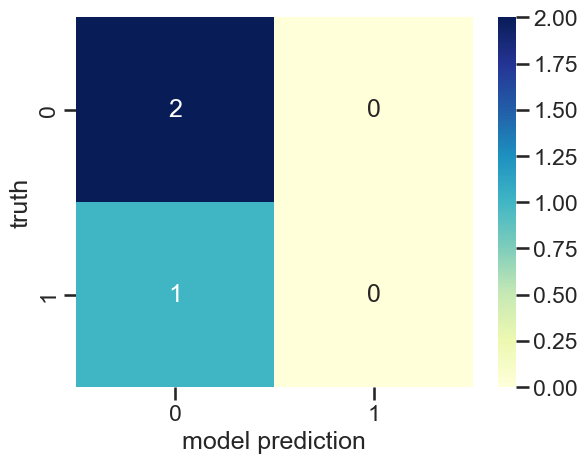

In [275]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


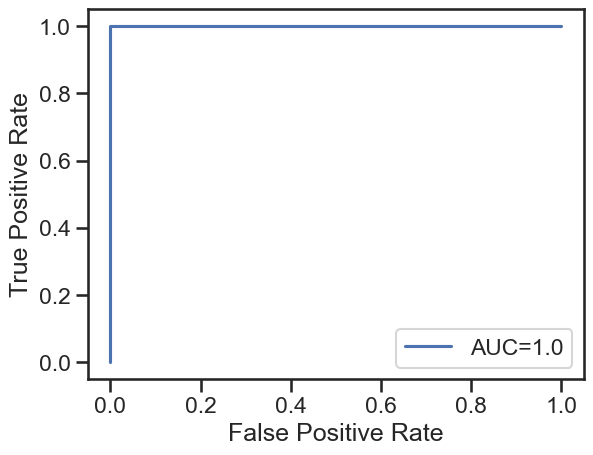

In [276]:
y_pred_proba = chronic_hypertension_t1_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_CH1 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_CH1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [367]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [368]:
chronic_hypertension_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [369]:
Y = chronic_hypertension_firstT_diffe_samples[["chronic_hypertension"]].values
X = chronic_hypertension_firstT_diffe_samples.loc[:, chronic_hypertension_firstT_diffe_samples.columns != "chronic_hypertension"].values

In [370]:
Y = Y.reshape(-1)

In [371]:
scores = cross_val_score(chronic_hypertension_t1_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
ch1_cv = np.mean(scores)
ch1_cv

0.7222222222222222

# Chronic Hypertension Trimester 2

## case: chronic hypertension control: healthy pregnancy

In [372]:
second_trimester_data["chronic_hypertension"] = np.where(second_trimester_data.disease.str.contains("Chronic-Hypertension"), 1, 0)
chronic_hypertension_secondT= second_trimester_data[(second_trimester_data.disease == "Normal-Pregnancy")| (second_trimester_data.disease == "Chronic-Hypertension")]
chronic_hypertension_secondT = chronic_hypertension_secondT.drop(["disease", "preeclampsia", "gestational_diabetes"], axis=1)
chronic_hypertension_secondT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,chronic_hypertension
82,0,12,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,60,0,0,0
87,0,0,0,0,3,0,0,0,0,0,...,0,23,0,0,2,1,90,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,1,28,0,0,0,12,109,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,8,97,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,28,0,0,0,18,97,0,0,0
104,2,1,0,0,0,0,0,0,0,1,...,0,102,0,0,0,13,208,0,0,0
105,0,0,0,0,5,0,0,0,0,0,...,0,33,0,0,0,25,173,0,0,0
121,0,0,0,0,2,0,0,0,0,0,...,0,3,3,0,0,2,27,1,0,0
122,4,0,0,0,0,0,0,0,0,0,...,0,44,0,0,0,59,274,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,88,0,0,0,28,155,7,0,1


## differential expression

In [373]:
chronic_hypertension_dif_exp_secondT = pd.read_csv("chronic_hypertension_diffe_secondT.txt", sep=" ")
chronic_hypertension_dif_exp_secondT = chronic_hypertension_dif_exp_secondT[chronic_hypertension_dif_exp_secondT["PValue"] < 0.05]
chronic_hypertension_dif_exp_secondT

,logFC,logCPM,PValue
92,-2.521427,2.245851,0.044565
185,-4.097526,0.809185,0.024522
289,-3.991827,0.906907,0.024575
324,-3.386648,1.749272,0.036053
467,-3.890800,1.259893,0.029305
...,...,...,...
57130,-3.994756,1.226717,0.049428
57197,-4.751146,0.897266,0.025296
57328,-4.100387,0.934855,0.035424
57467,-4.843949,1.056284,0.048241


In [374]:
chronic_hypertension_dif_exp_secondT = list(chronic_hypertension_dif_exp_secondT.index)
chronic_hypertension_dif_exp_secondT = [str(i) for i in chronic_hypertension_dif_exp_secondT]
chronic_hypertension_dif_exp_secondT

['92',
 '185',
 '289',
 '324',
 '467',
 '508',
 '616',
 '1345',
 '1362',
 '1435',
 '1452',
 '1960',
 '1974',
 '2083',
 '2100',
 '2169',
 '2306',
 '2909',
 '3170',
 '3384',
 '3593',
 '3834',
 '4232',
 '4670',
 '4939',
 '4980',
 '5191',
 '5317',
 '5806',
 '5813',
 '5961',
 '5993',
 '6126',
 '6477',
 '6827',
 '7137',
 '7148',
 '7168',
 '7406',
 '7477',
 '7478',
 '7703',
 '7741',
 '7910',
 '7977',
 '8008',
 '8257',
 '8427',
 '8681',
 '8805',
 '8983',
 '9088',
 '9116',
 '9131',
 '9250',
 '9513',
 '9548',
 '9556',
 '9596',
 '10504',
 '10795',
 '10929',
 '10962',
 '11348',
 '11385',
 '11870',
 '12072',
 '12497',
 '13037',
 '13172',
 '13403',
 '13410',
 '13549',
 '13719',
 '13924',
 '13960',
 '14186',
 '14224',
 '14232',
 '14413',
 '14611',
 '14815',
 '15466',
 '15546',
 '15627',
 '15675',
 '15935',
 '16143',
 '16408',
 '16582',
 '16738',
 '16854',
 '16907',
 '16918',
 '17010',
 '17163',
 '17232',
 '17313',
 '17338',
 '17995',
 '18099',
 '18252',
 '18347',
 '18407',
 '18585',
 '18638',
 '18644

In [375]:
chronic_hypertension_secondT_diffe_samples = chronic_hypertension_secondT[chronic_hypertension_dif_exp_secondT]
chronic_hypertension_secondT_diffe_samples = chronic_hypertension_secondT_diffe_samples.join(chronic_hypertension_secondT["chronic_hypertension"])
chronic_hypertension_secondT_diffe_samples

,92,185,289,324,467,508,616,1345,1362,1435,...,56574,56707,56836,56907,57130,57197,57328,57467,57582,chronic_hypertension
82,0,0,0,3,0,0,0,0,1,43,...,9,137,0,0,0,0,0,0,0,0
87,0,0,0,6,0,0,0,1,28,25,...,25,245,8,0,0,0,2,0,0,0
88,0,0,0,24,0,0,1,0,74,43,...,59,2591,0,0,0,2,0,0,0,0
97,0,0,0,0,0,0,0,0,17,0,...,17,134,7,0,0,0,0,0,0,0
98,0,0,0,12,0,0,0,0,33,8,...,2,129,0,0,0,0,3,0,0,0
104,0,0,0,8,0,0,0,0,44,66,...,40,1021,0,0,0,0,1,0,0,0
105,0,1,1,1,0,0,0,0,38,70,...,1,176,3,0,0,0,4,0,1,0
121,0,0,0,4,0,0,0,0,0,0,...,0,187,0,0,0,0,0,0,0,0
122,0,0,0,66,0,0,0,0,54,44,...,0,971,0,0,0,0,4,0,0,0
125,0,0,0,24,0,0,1,0,9,58,...,0,468,2,0,0,4,0,0,0,1


## logistic regression for the dataset above

In [389]:
Y = chronic_hypertension_secondT_diffe_samples[["chronic_hypertension"]]
X = chronic_hypertension_secondT_diffe_samples.loc[:, chronic_hypertension_secondT_diffe_samples.columns != "chronic_hypertension"]

In [390]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [391]:
y_test["chronic_hypertension"].value_counts(normalize=True) 

0    0.666667
1    0.333333
Name: chronic_hypertension, dtype: float64

In [392]:
y_train["chronic_hypertension"].value_counts(normalize=True) 

0    0.875
1    0.125
Name: chronic_hypertension, dtype: float64

In [393]:
chronic_hypertension_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
chronic_hypertension_t2_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [394]:
y_pred = chronic_hypertension_t2_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [395]:
accuracy_score(y_test, y_pred)

1.0

In [383]:
mean_squared_error(y_test, y_pred)

0.0

## heatmap

In [285]:
predictions = chronic_hypertension_t2_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 1.])

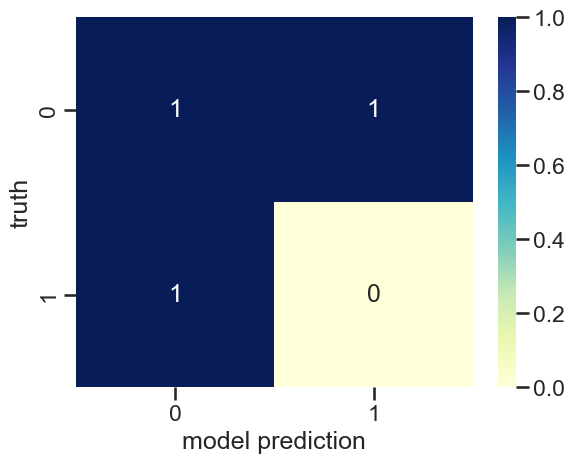

In [286]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


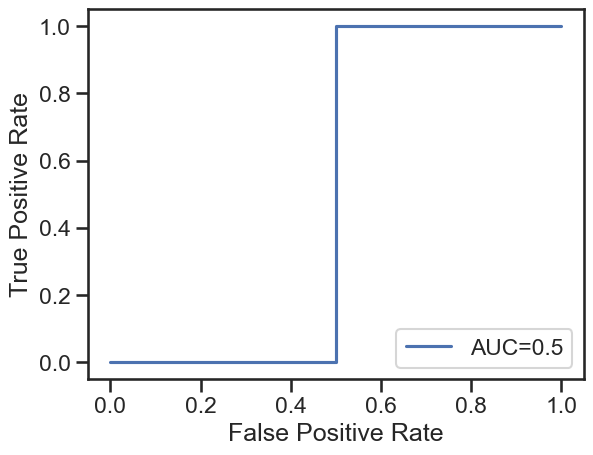

In [287]:
y_pred_proba = chronic_hypertension_t2_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_CH2 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_CH2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [396]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [397]:
chronic_hypertension_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [398]:
Y = chronic_hypertension_secondT_diffe_samples[["chronic_hypertension"]].values
X = chronic_hypertension_secondT_diffe_samples.loc[:, chronic_hypertension_secondT_diffe_samples.columns != "chronic_hypertension"].values

In [399]:
Y = Y.reshape(-1)

In [400]:
scores = cross_val_score(chronic_hypertension_t2_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
ch2_cv = np.mean(scores)
ch2_cv

0.85

# Chronic Hypertension Trimester 3

## case: chronic hypertension control: healthy pregnancy

In [401]:
## case: chronic hypertension control: healthy pregnancythird_trimester_data["chronic_hypertension"] = np.where(third_trimester_data.disease.str.contains("Chronic-Hypertension"), 1, 0)
chronic_hypertension_thirdT = third_trimester_data[(third_trimester_data.disease == "Normal-Pregnancy")| (third_trimester_data.disease == "Chronic-Hypertension")]
chronic_hypertension_thirdT = chronic_hypertension_thirdT.drop(["disease", "preeclampsia", "gestational_diabetes"], axis=1)
chronic_hypertension_thirdT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,chronic_hypertension
81,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,6,0,0,0,0,0,0,0,0,0,...,0,9,0,0,0,0,40,0,0,0
96,0,2,0,0,0,0,0,0,0,0,...,0,53,0,0,0,3,102,1,0,0
101,0,2,0,0,0,0,0,0,0,2,...,0,272,0,0,0,30,570,0,0,0
102,20,2,0,0,0,0,0,7,0,0,...,0,8,0,0,0,5,96,0,0,0
106,0,0,0,0,10,0,0,0,0,0,...,0,52,1,0,0,26,70,2,0,0
107,0,1,0,0,0,0,0,0,0,0,...,0,130,0,0,0,26,422,0,0,0
112,1,0,0,0,0,0,0,0,0,0,...,0,44,0,0,0,5,205,8,0,0
115,0,0,0,0,0,0,0,4,0,0,...,0,27,0,0,1,5,116,1,0,0
127,0,0,0,0,0,0,0,1,0,0,...,0,59,0,0,0,3,146,0,0,1


## differential expression

In [402]:
chronic_hypertension_dif_exp_thirdT = pd.read_csv("chronic_hypertension_diffe_thirdT.txt", sep=" ")
chronic_hypertension_dif_exp_thirdT = chronic_hypertension_dif_exp_thirdT[chronic_hypertension_dif_exp_thirdT["PValue"] < 0.05]
chronic_hypertension_dif_exp_thirdT

,logFC,logCPM,PValue
71,-2.774126,1.752895,0.049566
307,-1.759767,5.099182,0.046202
348,-4.449232,1.134915,0.016652
378,-3.047571,0.806692,0.047664
444,-3.329750,0.690988,0.036692
...,...,...,...
57639,-3.595211,1.522385,0.014209
57668,-4.696458,0.879228,0.018147
57678,-2.823560,1.789271,0.032195
57705,-3.708322,1.432204,0.019112


In [403]:
chronic_hypertension_dif_exp_thirdT = list(chronic_hypertension_dif_exp_thirdT.index)
chronic_hypertension_dif_exp_thirdT = [str(i) for i in chronic_hypertension_dif_exp_thirdT]
chronic_hypertension_dif_exp_thirdT

['71',
 '307',
 '348',
 '378',
 '444',
 '508',
 '587',
 '595',
 '616',
 '857',
 '957',
 '993',
 '1000',
 '1026',
 '1047',
 '1218',
 '1284',
 '1296',
 '1305',
 '1324',
 '1328',
 '1331',
 '1340',
 '1345',
 '1380',
 '1406',
 '1451',
 '1489',
 '1541',
 '1633',
 '1651',
 '1722',
 '1775',
 '1786',
 '1793',
 '1872',
 '1927',
 '1946',
 '1960',
 '1963',
 '2032',
 '2078',
 '2104',
 '2119',
 '2176',
 '2186',
 '2253',
 '2288',
 '2295',
 '2301',
 '2333',
 '2424',
 '2431',
 '2446',
 '2475',
 '2501',
 '2523',
 '2544',
 '2576',
 '2591',
 '2651',
 '2665',
 '2757',
 '2775',
 '2781',
 '2794',
 '2840',
 '2882',
 '2992',
 '3111',
 '3148',
 '3151',
 '3166',
 '3183',
 '3202',
 '3253',
 '3255',
 '3266',
 '3268',
 '3284',
 '3308',
 '3358',
 '3435',
 '3496',
 '3509',
 '3545',
 '3589',
 '3594',
 '3655',
 '3666',
 '3689',
 '3713',
 '3717',
 '3839',
 '3868',
 '3904',
 '3907',
 '3909',
 '3940',
 '3990',
 '4000',
 '4033',
 '4069',
 '4195',
 '4197',
 '4208',
 '4210',
 '4237',
 '4248',
 '4264',
 '4274',
 '4327',
 '434

In [404]:
chronic_hypertension_thirdT_diffe_samples = chronic_hypertension_thirdT[chronic_hypertension_dif_exp_thirdT]
chronic_hypertension_thirdT_diffe_samples = chronic_hypertension_thirdT_diffe_samples.join(chronic_hypertension_thirdT["chronic_hypertension"])
chronic_hypertension_thirdT_diffe_samples

,71,307,348,378,444,508,587,595,616,857,...,57522,57527,57582,57634,57639,57668,57678,57705,57710,chronic_hypertension
81,0,0,0,0,0,0,0,0,0,35,...,9,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,513,...,0,0,0,0,0,0,0,0,0,0
96,2,0,0,2,0,0,0,0,3,438,...,1,0,0,0,0,0,0,0,0,0
101,22,0,0,0,0,0,0,13,0,867,...,0,8,0,0,0,0,0,0,0,0
102,2,0,0,0,0,0,0,1,0,214,...,0,3,0,0,0,3,0,0,0,0
106,1,0,0,5,0,0,0,2,5,544,...,3,2,2,0,0,1,1,0,0,0
107,5,0,0,0,0,0,0,1,0,831,...,1,5,0,0,0,5,0,0,0,0
112,15,0,0,1,0,0,0,2,0,463,...,1,0,0,0,0,2,0,0,0,0
115,1,0,0,3,0,0,0,0,5,254,...,0,0,0,0,0,0,0,0,0,0
127,6,0,0,0,0,0,0,0,0,497,...,0,0,0,0,0,0,0,0,0,1


## logistic regression with the dataset above

In [405]:
Y = chronic_hypertension_thirdT_diffe_samples[["chronic_hypertension"]]
X = chronic_hypertension_thirdT_diffe_samples.loc[:, chronic_hypertension_thirdT_diffe_samples.columns != "chronic_hypertension"]

In [406]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [407]:
y_test["chronic_hypertension"].value_counts(normalize=True) 

0    0.666667
1    0.333333
Name: chronic_hypertension, dtype: float64

In [408]:
y_train["chronic_hypertension"].value_counts(normalize=True) 

0    0.875
1    0.125
Name: chronic_hypertension, dtype: float64

In [409]:
chronic_hypertension_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
chronic_hypertension_t3_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [410]:
y_pred = chronic_hypertension_t3_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [411]:
accuracy_score(y_test, y_pred)

0.3333333333333333

In [412]:
mean_squared_error(y_test, y_pred)

0.6666666666666666

## heatmap

In [305]:
predictions = chronic_hypertension_t3_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 1.])

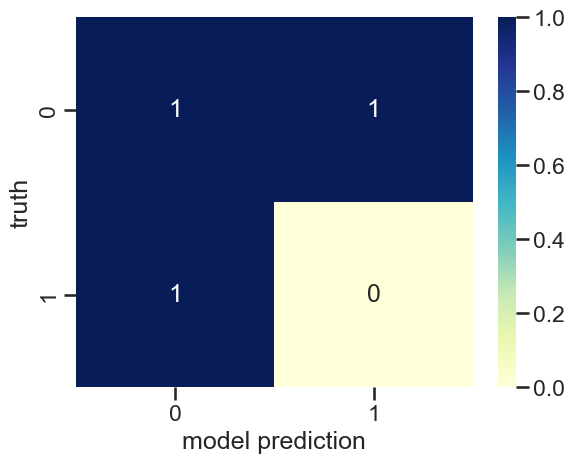

In [306]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


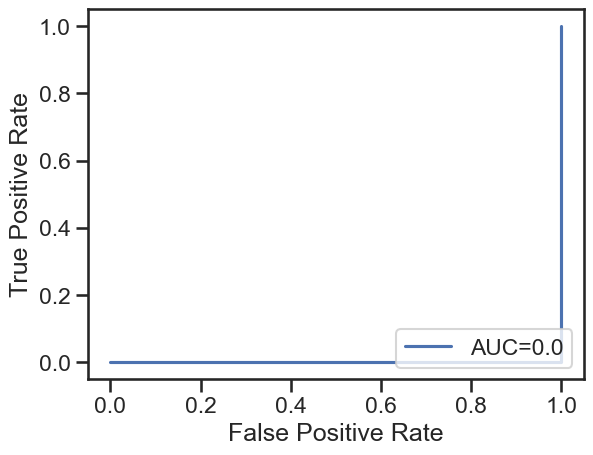

In [322]:
y_pred_proba = chronic_hypertension_t3_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_CH3 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_CH3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [413]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [414]:
chronic_hypertension_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [415]:
Y = chronic_hypertension_thirdT_diffe_samples[["chronic_hypertension"]].values
X = chronic_hypertension_thirdT_diffe_samples.loc[:, chronic_hypertension_thirdT_diffe_samples.columns != "chronic_hypertension"].values

In [416]:
Y = Y.reshape(-1)

In [417]:
scores = cross_val_score(chronic_hypertension_t3_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
ch3_cv = np.mean(scores)
ch3_cv

0.55

# Chronic Hypertension AUC/ROC scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


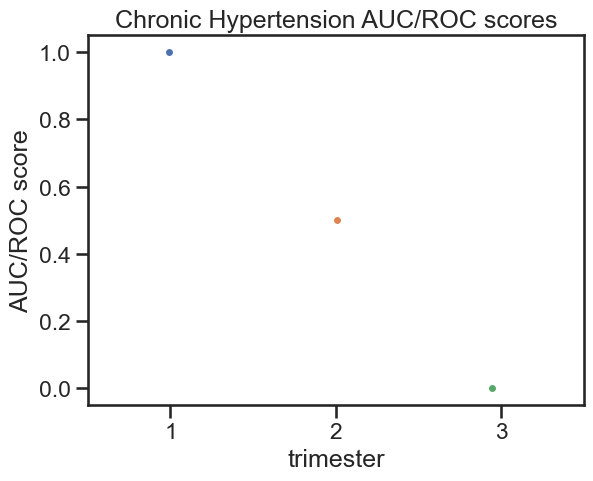

In [324]:
x =["1", "2", "3"]
y =[auc_CH1, auc_CH2, auc_CH3]
  
auc_plot_P1 = sns.stripplot(x, y);
auc_plot_P1.set(xlabel ='trimester', ylabel ='AUC/ROC score')
  
plt.title('Chronic Hypertension AUC/ROC scores');
plt.show()

# Normal Pregnancy Trimester 1

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [418]:
## case: pregnancy complications (all diseases) control: healthy pregnancyfirst_trimester_data["normal_pregnancy"] = np.where(first_trimester_data.disease.str.contains("Normal-Pregnancy"), 1, 0)
normal_pregnancy_firstT = first_trimester_data.drop(["disease"], axis=1)
normal_pregnancy_firstT = normal_pregnancy_firstT.drop(["preeclampsia","gestational_diabetes", "chronic_hypertension"], axis=1)
normal_pregnancy_firstT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,normal_pregnancy
2,0,1,0,0,0,0,0,0,0,0,...,0,17,0,0,0,7,132,1,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47,0,0,0
5,1,1,0,0,6,0,0,0,0,0,...,0,13,2,0,0,2,76,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,47,0,0,0,0,30,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,28,0,0,0,10,111,11,0,0
22,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,65,0,0,0
25,0,0,0,0,3,0,0,0,0,0,...,0,26,0,0,0,0,160,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,83,0,0,0
43,0,5,0,0,0,0,0,0,0,1,...,0,24,0,0,0,0,65,0,0,0
44,11,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,4,95,1,0,0


## logistic regression with the table above

In [419]:
Y = normal_pregnancy_firstT[["normal_pregnancy"]]
X = normal_pregnancy_firstT.loc[:, normal_pregnancy_firstT.columns != "normal_pregnancy"]

In [420]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [421]:
y_test["normal_pregnancy"].value_counts(normalize=True) 

0    0.875
1    0.125
Name: normal_pregnancy, dtype: float64

In [422]:
y_train["normal_pregnancy"].value_counts(normalize=True) 

0    0.588235
1    0.411765
Name: normal_pregnancy, dtype: float64

In [423]:
normal_pregnancy_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
normal_pregnancy_t1_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [424]:
y_pred = normal_pregnancy_t1_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [425]:
accuracy_score(y_test, y_pred)

0.875

In [426]:
mean_squared_error(y_test, y_pred)

0.125

## cnf matrix

predictions.round(1)
np.rint(predictions)

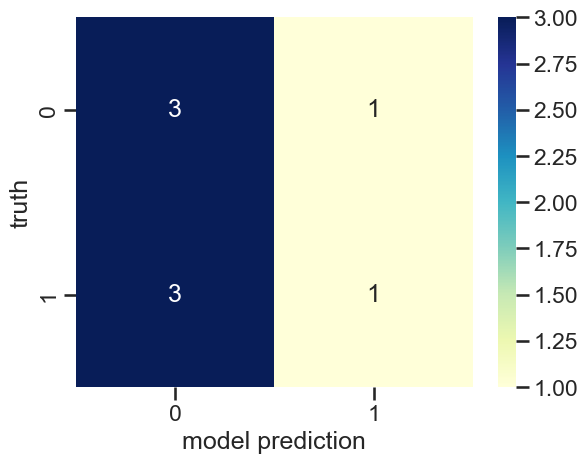

In [335]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


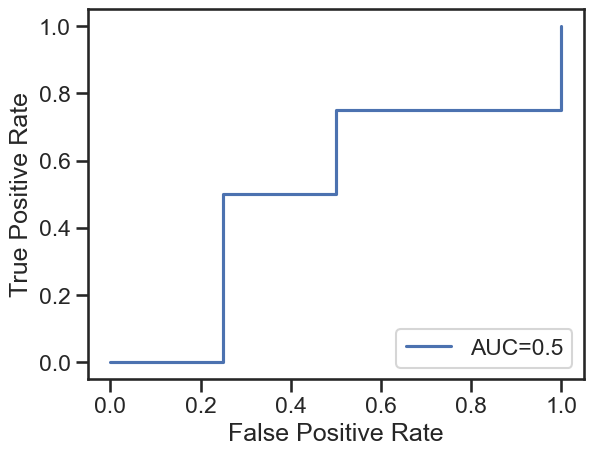

In [336]:
y_pred_proba = normal_pregnancy_t1_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_N1 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_N1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [427]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [428]:
normal_pregnancy_t1_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [429]:
Y = normal_pregnancy_firstT[["normal_pregnancy"]].values
X = normal_pregnancy_firstT.loc[:, normal_pregnancy_firstT.columns != "normal_pregnancy"].values

In [430]:
Y = Y.reshape(-1)

In [431]:
scores = cross_val_score(normal_pregnancy_t1_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
n1_cv = np.mean(scores)
n1_cv

0.75

# Normal Pregnancy Trimester 2

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [432]:
## case: pregnancy complications (all diseases) control: healthy pregnancysecond_trimester_data["normal_pregnancy"] = np.where(second_trimester_data.disease.str.contains("Normal-Pregnancy"), 1, 0)
normal_pregnancy_secondT = second_trimester_data.drop(["disease"], axis=1)
normal_pregnancy_secondT = normal_pregnancy_secondT.drop(["gestational_diabetes", "chronic_hypertension", "preeclampsia"], axis=1)
normal_pregnancy_secondT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,normal_pregnancy
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,0
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,0
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,0
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,0
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,0
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,0
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,0
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,0
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,0


## logistic regression with the table above

In [433]:
Y = normal_pregnancy_secondT[["normal_pregnancy"]]
X = normal_pregnancy_secondT.loc[:, normal_pregnancy_secondT.columns != "normal_pregnancy"]

In [434]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [435]:
y_test["normal_pregnancy"].value_counts(normalize=True) 

0    0.875
1    0.125
Name: normal_pregnancy, dtype: float64

In [436]:
y_train["normal_pregnancy"].value_counts(normalize=True) 

0    0.555556
1    0.444444
Name: normal_pregnancy, dtype: float64

In [437]:
normal_pregnancy_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
normal_pregnancy_t2_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [438]:
y_pred = normal_pregnancy_t2_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [439]:
accuracy_score(y_test, y_pred)

0.5

In [210]:
mean_squared_error(y_test, y_pred)

0.5

## cnf matrix

In [351]:
predictions = normal_pregnancy_t2_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 0., 0., 1., 1., 0., 1.])

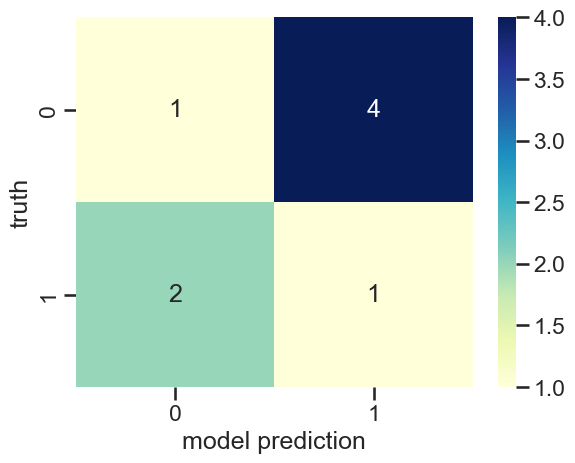

In [352]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


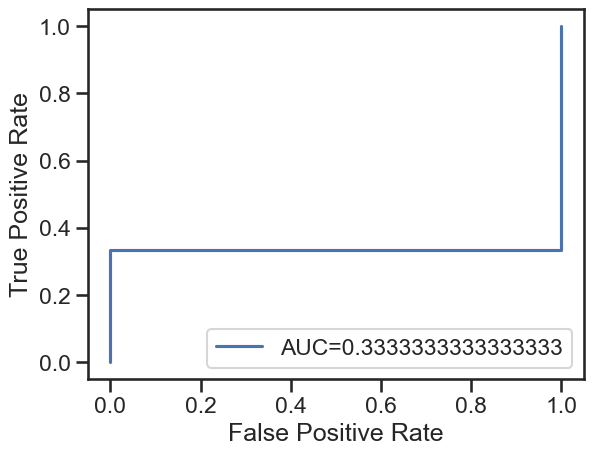

In [353]:
y_pred_proba = normal_pregnancy_t2_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_N2 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_N2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [440]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [441]:
normal_pregnancy_t2_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [442]:
Y = normal_pregnancy_secondT[["normal_pregnancy"]].values
X = normal_pregnancy_secondT.loc[:, normal_pregnancy_secondT.columns != "normal_pregnancy"].values

In [443]:
Y = Y.reshape(-1)

In [444]:
scores = cross_val_score(normal_pregnancy_t2_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
n2_cv = np.mean(scores)
n2_cv

0.5

# Normal Pregnancy Trimester 3

## case: pregnancy complications (all diseases) control: healthy pregnancy

In [445]:
## case: pregnancy complications (all diseases) control: healthy pregnancythird_trimester_data["normal_pregnancy"] = np.where(third_trimester_data.disease.str.contains("Normal-Pregnancy"), 1, 0)
normal_pregnancy_thirdT = third_trimester_data.drop(["disease"], axis=1)
normal_pregnancy_thirdT = normal_pregnancy_thirdT.drop(["gestational_diabetes", "chronic_hypertension", "preeclampsia"], axis=1)
normal_pregnancy_thirdT

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,normal_pregnancy
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,0
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,0
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,0
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,0
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,0
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,0
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,0
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,0
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,0


## logistic regression with the table above

In [446]:
Y = normal_pregnancy_thirdT[["normal_pregnancy"]]
X = normal_pregnancy_thirdT.loc[:, normal_pregnancy_thirdT.columns != "normal_pregnancy"]

In [447]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [448]:
y_test["normal_pregnancy"].value_counts(normalize=True) 

0    0.875
1    0.125
Name: normal_pregnancy, dtype: float64

In [449]:
y_train["normal_pregnancy"].value_counts(normalize=True) 

0    0.529412
1    0.470588
Name: normal_pregnancy, dtype: float64

In [450]:
normal_pregnancy_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)
normal_pregnancy_t3_logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=1000)

In [451]:
y_pred = normal_pregnancy_t3_logit.predict(x_test) # we then test it on our held out data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [452]:
accuracy_score(y_test, y_pred)

0.625

In [453]:
mean_squared_error(y_test, y_pred)

0.375

## cnf matrix

In [368]:
predictions = normal_pregnancy_t3_logit.predict(x_test)
predictions.round(1)
np.rint(predictions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 1., 0., 0.])

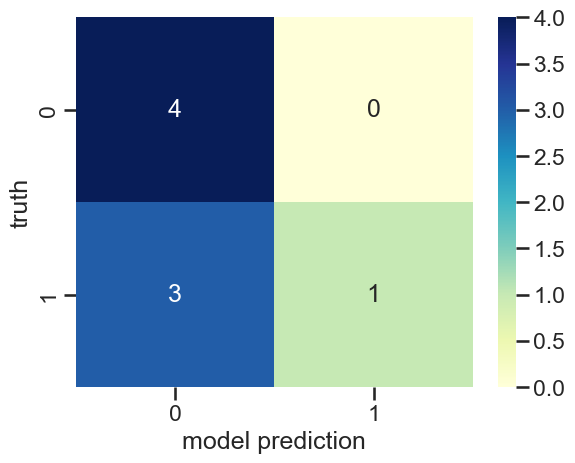

In [369]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## AUC/ROC curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


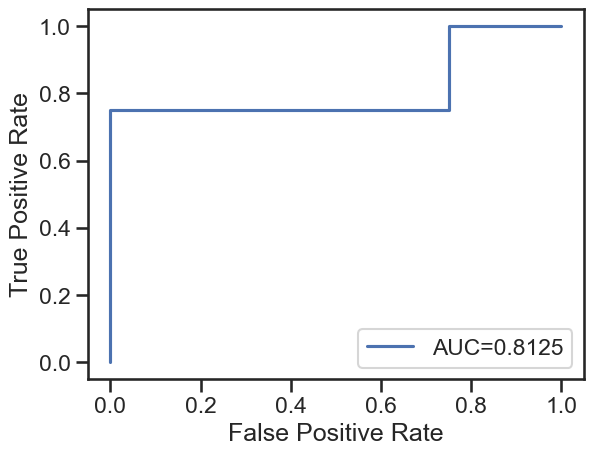

In [370]:
y_pred_proba = normal_pregnancy_t3_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_N3 = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_N3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## cross validation

In [454]:
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [455]:
normal_pregnancy_t3_logit = LogisticRegression(solver="lbfgs", max_iter=1000)

In [456]:
Y = normal_pregnancy_thirdT[["normal_pregnancy"]].values
X = normal_pregnancy_thirdT.loc[:, normal_pregnancy_thirdT.columns != "normal_pregnancy"].values

In [457]:
Y = Y.reshape(-1)

In [458]:
scores = cross_val_score(normal_pregnancy_t3_logit, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
n3_cv = np.mean(scores)
n3_cv

0.6041666666666666

# Normal Pregnancy AUC/ROC scores

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


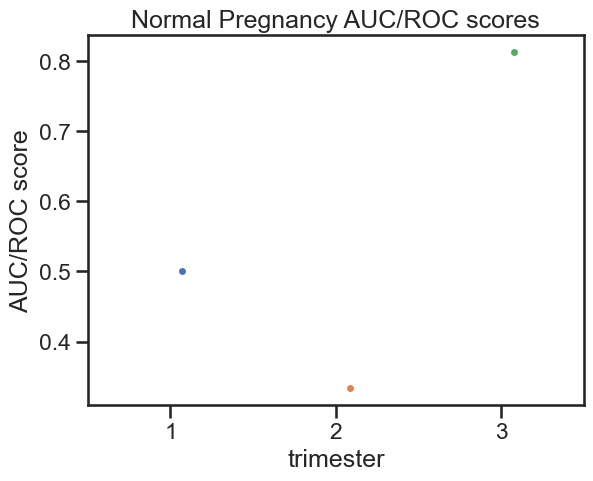

In [376]:
x =["1", "2", "3"]
y =[auc_N1, auc_N2, auc_N3]
  
auc_plot_P1 = sns.stripplot(x, y);
auc_plot_P1.set(xlabel ='trimester', ylabel ='AUC/ROC score')
  
plt.title('Normal Pregnancy AUC/ROC scores');
plt.show()

In [459]:
cv_data = {'cv score': [p1_cv, p2_cv, p3_cv, gd1_cv, gd2_cv, gd3_cv, ch1_cv, ch2_cv, ch3_cv, n1_cv, n2_cv, n2_cv],
           'trimester': ['t1', 't2', 't3', 't1', 't2', 't3', 't1', 't2', 't3', "t1", "t2", "t3"],
           'disease': ['preeclampsia', 'preeclampsia', 'preeclampsia', 
                       'gestational diabetes', 'gestational diabetes', 'gestational diabetes',
                       'chronic hypertension', 'chronic hypertension', 'chronic hypertension',
                       'normal pregnancy', 'normal pregnancy', 'normal pregnancy',]}

cv_df = pd.DataFrame(cv_data)
cv_df

,cv score,trimester,disease
0,0.733333,t1,preeclampsia
1,0.468750,t2,preeclampsia
2,0.593750,t3,preeclampsia
3,0.571429,t1,gestational diabetes
4,0.633333,t2,gestational diabetes
5,0.500000,t3,gestational diabetes
6,0.722222,t1,chronic hypertension
7,0.850000,t2,chronic hypertension
8,0.550000,t3,chronic hypertension
9,0.750000,t1,normal pregnancy


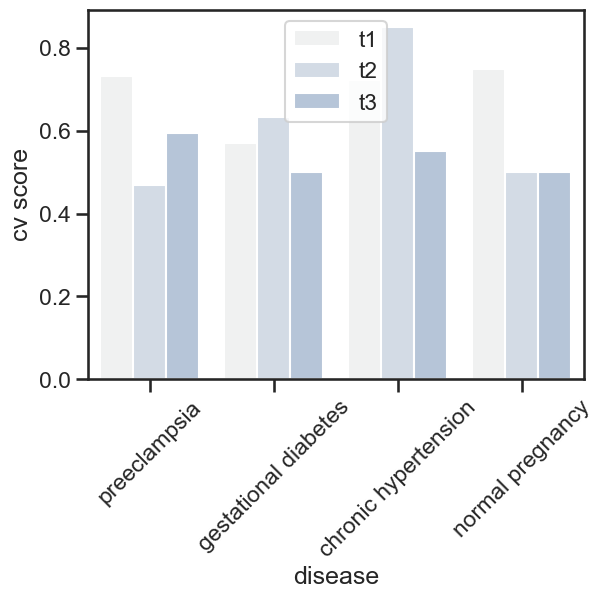

In [461]:
sns.barplot(data = cv_df, x = 'disease', y = 'cv score', color = 'lightsteelblue', hue = 'trimester', ci = None,)
plt.xticks(rotation=45)
plt.legend(loc='upper center')